# BGGN 212 Co-evolution Project

In [2]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import parser

In [8]:
def coEvo_N(eps,N,X1,Y1,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t1):
    
    
    # initialize Numpy array
    data = np.zeros((N,100000,3))
    mutrate1a = np.zeros((N,100000,1))
    mutrate1s = np.zeros((N,100000,1))
    mutrate2a= np.zeros((N,100000,1))
    mutrate2s= np.zeros((N,100000,1))
     # eps  increment value
    Stand_data=np.zeros((N,int(T/eps),2))
   
    count=np.ones((N),dtype=int)
    for i in range(N):
#       Assigning to a different variable since this value changes in each iteration i, and if did not do this,
  #     then the first data adding will take place from the previous iteration, which we do not want obvio
        X=X1
        Y=Y1
        t=t1
      
        #add first data
        data[i,0,:]=[t, X, Y]

        # Main loop
        while t < T and ((count[i])<100000):
            if (X <= 0) | (Y<=0):
                break

            rate1 = parser.expr(expr1).compile()
            rate2= parser.expr(expr2).compile()
            rate3 = parser.expr(expr3).compile()
            rate4= parser.expr(expr4).compile()

            u1a =eval(rate1)
            u1s =eval(rate2)
            u2a =eval(rate3)
            u2s =eval(rate4)

    #         u1a =num1-(X*_alpha1)
    #         u1s =num2-(X *_beta1) 
    #         u2a =num1-(Y *_alpha2) 
    #         u2s =num2-(Y *_beta2)

            if u1a <0:
                u1a=0
            if u1s<0:
                u1s=0
            if u2a <0:
                u2a=0
            if u2s<0:
                u2s=0   
           
        
           # saving the mutation rates
            mutrate1a[i,(count[i]-1)]=u1a
            mutrate1s[i,(count[i]-1)]=u1s
            mutrate2a[i,(count[i]-1)]=u2a
            mutrate2s[i,(count[i]-1)]=u2s

            W = u1a + u1s+ u2a+ u2s
            if W == 0: break

            # time point at which evolution happens
            dt = -math.log(random.uniform(0.0, 1.0))/W
            t = t + dt

            # make adjustment of comapring which is small and use in place of u1s
            rand=random.uniform(0.0, 1.0)
            if rand < u1a / W:
                #A1 deleterious mutation in Y
                X = X + 1
                Y = Y - 1
            elif rand < (u1a+u1s) / W:
                #S1 beneficial mutation in Y
                X = X + 1
                Y = Y + 1
            elif rand<(u1a+u1s+u2a)/W:
                #A2 
                X = X - 1
                Y = Y + 1
            else:
                #S2
                X = X + 1
                Y = Y + 1     

            data[i,count[i],:]=[t, X, Y]
            count[i]+=1
            
            #   finding the average across all of the plots 
  # first storing all the values that are less than a part value and greater than another in an a 3d matrix
  # can call it standardization with respect to fixed time intervals 
    
     # this thing is outside the while loop but inside the big for loop
       
        count1=0; # counting for how many values < and >
        count2=0; # storing how many iterations have passed
        count3=0; # storing the value of count1 from the previous iteration
   
        for h in np.arange(0,int(T),eps):
            while((data[i,count1,0] <h+10) and (data[i,count1,0]>=h)):
                count1+=1
                if (count1==100000):
                    break
                
            
            Stand_data[i,count2,:]=np.nanmean(data[i,count3:count1,:],axis=0)[1:3]  
            count3=count1
            count2+=1
            if count1>=100000:
                break
                
    
                
             



#   now doing the average across the stand data matrix , this thing is outside the for loop
                  
    Avg_data=np.nanmean(Stand_data,axis=0)
    # select only the data that is in the same time ranges as the 1 realisation that we are showing in the plots
    print(data[0,count[0]-1,0])
    print(data[0,count[0]-2,0])
    Avg_data_plot=Avg_data[0:int(data[0,count[0]-1,0]/eps),:]  # eps because h is taking values at intervals of eps , first entry at 0, second at one and so on
    print(Avg_data_plot)
    print(eps*np.arange(0,int(data[0,count[0]-1,0]/eps)))  # 1 BECAUSE denoting the average at the end of the interval

    
    # Ploting
    #print(data[0,0:count[0],0])
    
    

    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[0,0:count[0],1],data[0,0:count[0],2])
    ax[0].set_xlabel('Species 1',fontsize = 16)
    ax[0].set_ylabel('Species 2',fontsize = 16)
    ax[0].tick_params(axis='both', which='major', labelsize=12)
    
    extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('dep_ANTIlater1.png', bbox_inches=extent.expanded(1.3, 1.2))


    figure1=ax[1].plot(data[0,0:count[0],0],data[0,0:count[0],1],data[0,0:count[0],0],data[0,0:count[0],2],eps*np.arange(0,int(data[0,count[0]-1,0]/eps)),Avg_data_plot[:,0],eps*np.arange(0,int(data[0,count[0]-1,0]/eps)),Avg_data_plot[:,1])
    ax[1].legend(figure1, ('Species 1','Species 2','Mean Species 1','Mean Species 2'),fontsize = 12)
    ax[1].set_xlabel('Time',fontsize = 16)
    ax[1].set_ylabel('Species',fontsize = 16)
    ax[1].tick_params(axis='both', which='major', labelsize=12)
    extent = ax[1].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('dep_ANTIlater2.png', bbox_inches=extent.expanded(1.3, 1.2))

    

    figure2=ax[2].plot(data[0,np.arange(0,(count[0]-1)),0],mutrate1a[0,0:count[0]-1],data[0,np.arange(0,(count[0]-1)),0],mutrate1s[0,0:count[0]-1]) # np.arange is doing time 
    ax[2].set_xlabel('Time',fontsize = 18)
    ax[2].set_ylabel('Mutation rates species 1',fontsize = 18)
    ax[2].legend(figure2, ('Rate 1a','Rate1s'),fontsize = 12)
    ax[3].tick_params(axis='both', which='major', labelsize=12)
    
    extent = ax[2].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('dep_ANTIlater3.png', bbox_inches=extent.expanded(1.3, 1.2))

    figure3=ax[3].plot(data[0,np.arange(0,(count[0]-1)),0],mutrate2a[0,0:count[0]-1],data[0,np.arange(0,(count[0]-1),1),0],mutrate2s[0,0:count[0]-1])
    ax[3].set_xlabel('Time',fontsize = 18)
    ax[3].set_ylabel('Mutation rates species 2',fontsize = 18)
    ax[3].legend(figure3,('Rate 2a','Rate2s'),fontsize = 12)
    ax[3].tick_params(axis='both', which='major', labelsize=12)
    
    extent = ax[3].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('dep_ANTIlater4.png', bbox_inches=extent.expanded(1.3, 1.2))
    return;

NameError: name 'data' is not defined

In [2]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1
num1=0  # not needed
num2=0
N=1000

coEvo_N(N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

NameError: name 'np' is not defined

800.0
727.2727272727273
666.6666666666666
615.3846153846154
571.4285714285714
533.3333333333334
500.0
470.5882352941176
444.44444444444446
421.05263157894734
400.0
380.95238095238096
363.6363636363636
347.82608695652175
333.3333333333333
320.0
307.6923076923077
296.2962962962963
285.7142857142857
275.86206896551727
266.6666666666667
258.06451612903226
250.0
242.42424242424244
235.2941176470588
228.57142857142858
222.22222222222223
216.21621621621622
210.52631578947367
205.12820512820514
200.0
195.1219512195122
190.47619047619048
186.04651162790697
181.8181818181818
177.77777777777777
173.91304347826087
170.2127659574468
166.66666666666666
163.26530612244898
160.0
156.86274509803923
153.84615384615384
150.9433962264151
148.14814814814815
145.45454545454547
142.85714285714286
140.35087719298247
137.93103448275863
135.59322033898306
133.33333333333334
131.14754098360655
129.03225806451613
126.98412698412699
125.0
123.07692307692308
121.21212121212122
119.40298507462687
117.6470588235294
1

11.299435028248588
11.283497884344147
11.267605633802816
11.251758087201125
11.235955056179776
11.220196353436185
11.204481792717086
11.188811188811188
11.1731843575419
11.157601115760112
11.142061281337048
11.126564673157162
11.11111111111111
11.095700416088766
11.0803324099723
11.065006915629322
11.049723756906078
11.03448275862069
11.019283746556473
11.004126547455297
10.989010989010989
10.973936899862826
10.95890410958904
10.943912448700411
10.92896174863388
10.914051841746248
10.899182561307901
10.884353741496598
10.869565217391305
10.854816824966079
10.840108401084011
10.825439783491204
10.81081081081081
10.796221322537113
10.78167115902965
10.767160161507402
10.75268817204301
10.738255033557047
10.723860589812332
10.7095046854083
10.695187165775401
10.68090787716956
10.666666666666666
10.652463382157125
10.638297872340425
10.624169986719787
10.610079575596817
10.596026490066226
10.582010582010582
10.568031704095112
10.554089709762533
10.540184453227932
10.526315789473685
10.5124

5.547850208044383
5.544005544005544
5.54016620498615
5.536332179930795
5.532503457814661
5.5286800276434
5.524861878453039
5.521048999309869
5.517241379310345
5.5134390075809785
5.509641873278237
5.505849965588438
5.502063273727648
5.498281786941581
5.4945054945054945
5.490734385724091
5.486968449931413
5.483207676490747
5.47945205479452
5.475701574264202
5.471956224350206
5.468215994531784
5.46448087431694
5.460750853242321
5.457025920873124
5.453306066802999
5.449591280653951
5.4458815520762425
5.442176870748299
5.438477226376614
5.434782608695652
5.431093007467753
5.4274084124830395
5.423728813559322
5.420054200542006
5.416384563303994
5.412719891745602
5.409060175794456
5.405405405405405
5.401755570560432
5.398110661268556
5.394470667565745
5.390835579514825
5.3872053872053876
5.383580080753701
5.379959650302623
5.376344086021505
5.372733378106111
5.369127516778524
5.365526492287056
5.361930294906166
5.35833891493637
5.35475234270415
5.351170568561873
5.347593582887701
5.3440213760

3.766478342749529
3.764705882352941
3.762935089369708
3.761165961448049
3.7593984962406015
3.757632691404415
3.755868544600939
3.7541060534960113
3.75234521575985
3.750586029067042
3.7488284910965324
3.747072599531616
3.745318352059925
3.7435657463734207
3.7418147801683816
3.7400654511453952
3.7383177570093458
3.736571695469407
3.734827264239029
3.733084461035931
3.7313432835820897
3.7296037296037294
3.7278657968313142
3.7261294829995344
3.7243947858473
3.7226617031177294
3.7209302325581395
3.7192003719200373
3.717472118959108
3.7157454714352065
3.714020427112349
3.7122969837587005
3.7105751391465676
3.7088548910523875
3.7071362372567194
3.7054191755442334
3.7037037037037037
3.7019898195279963
3.700277520814061
3.6985668053629217
3.6968576709796674
3.695150115473441
3.693444136657433
3.691739732348869
3.690036900369004
3.6883356385431076
3.686635944700461
3.684937816674344
3.6832412523020257
3.6815462494247586
3.6798528058877644
3.67816091954023
3.676470588235294
3.6747818098300415
3.6

2.7027027027027026
2.701789935832489
2.700877785280216
2.6999662504218698
2.699055330634278
2.69814502529511
2.6972353337828725
2.6963262554769125
2.6954177897574123
2.6945099360053892
2.6936026936026938
2.6926960619320095
2.6917900403768504
2.6908846283215606
2.6899798251513114
2.689075630252101
2.6881720430107525
2.6872690628149143
2.6863666890530555
2.685464921114468
2.684563758389262
2.6836632002683665
2.682763246143528
2.681863895407308
2.680965147453083
2.680067001675042
2.679169457468185
2.678272514228323
2.677376171352075
2.6764804282368684
2.6755852842809364
2.6746907388833168
2.6737967914438503
2.672903441363181
2.6720106880427523
2.671118530884808
2.67022696929239
2.669336002669336
2.66844563042028
2.66755585195065
2.6666666666666665
2.6657780739753414
2.664890073284477
2.664002664002664
2.663115845539281
2.6622296173044924
2.6613439787092483
2.660458929165281
2.6595744680851063
2.6586905948820205
2.6578073089700998
2.656924609764198
2.6560424966799467
2.6551609691337537
2.6

1.8639328984156571
1.8634987188446308
1.8630647414997672
1.8626309662398137
1.86219739292365
1.8617640214102862
1.8613308515588647
1.8608978832286578
1.8604651162790697
1.860032550569635
1.8596001859600186
1.8591680223100162
1.858736059479554
1.8583042973286876
1.8578727357176033
1.8574413745066172
1.8570102135561746
1.8565792527268508
1.8561484918793503
1.855717930874507
1.8552875695732838
1.8548574078367726
1.8544274455261938
1.853997682502897
1.8535681186283597
1.8531387537641881
1.8527095877721167
1.8522806205140079
1.8518518518518519
1.8514232816477667
1.8509949097639982
1.8505667360629192
1.8501387604070305
1.8497109826589595
1.8492834026814609
1.8488560203374163
1.8484288354898337
1.848001848001848
1.8475750577367205
1.8471484645578389
1.8467220683287164
1.8462958689129934
1.8458698661744346
1.845444059976932
1.845018450184502
1.8445930366612866
1.8441678192715538
1.8437427978796959
1.8433179723502304
1.8428933425478
1.842468908337172
1.8420446695832373
1.8416206261510129
1.8411

1.3280212483399734
1.3278008298755186
1.3275804845668768
1.327360212377634
1.3271400132714002
1.3269198872118095
1.3266998341625207
1.326479854087216
1.3262599469496021
1.3260401127134096
1.3258203513423932
1.3256006628003314
1.3253810470510272
1.3251615040583071
1.3249420337860218
1.324722636198046
1.3245033112582782
1.3242840589306406
1.3240648791790797
1.3238457719675658
1.3236267372600927
1.3234077750206783
1.3231888852133642
1.322970067802216
1.3227513227513228
1.3225326500247976
1.322314049586777
1.3220955214014212
1.3218770654329148
1.321658681645465
1.3214403700033035
1.3212221304706855
1.321003963011889
1.3207858675912167
1.3205678441729944
1.320349892721571
1.3201320132013201
1.3199142055766375
1.3196964698119433
1.3194788058716806
1.3192612137203166
1.3190436933223413
1.3188262446422683
1.3186088676446348
1.3183915622940012
1.3181743285549514
1.3179571663920921
1.3177400757700544
1.3175230566534915
1.3173061090070806
1.317089232795522
1.316872427983539
1.316655694535879
1.31

1.063264221158958
1.06312292358804
1.0629816635663034
1.062840441078783
1.0626992561105206
1.0625581086465665
1.0624169986719787
1.062275926171823
1.0621348911311737
1.061993893535112
1.0618529333687283
1.06171201061712
1.0615711252653928
1.06143027729866
1.061289466702043
1.061148693460671
1.0610079575596818
1.0608672589842196
1.0607265977194378
1.0605859737504972
1.0604453870625663
1.0603048376408217
1.0601643254704478
1.060023850536637
1.0598834128245893
1.0597430123195126
1.0596026490066226
1.0594623228711428
1.0593220338983051
1.0591817820733482
1.0590415673815197
1.0589013898080741
1.0587612493382743
1.0586211459573904
1.0584810796507012
1.0583410504034925
1.0582010582010581
1.0580611030287
1.0579211848717271
1.0577813037154569
1.0576414595452142
1.0575016523463319
1.0573618821041502
1.0572221488040174
1.0570824524312896
1.0569427929713304
1.0568031704095113
1.0566635847312111
1.0565240359218173
1.056384523966724
1.0562450488513335
1.056105610561056
1.0559662090813093
1.055826844

0.9474182851729038
0.9473060982830077
0.947193937958797
0.947081804190837
0.946969696969697
0.946857616285951
0.9467455621301775
0.9466335344929594
0.9465215333648841
0.9464095587365432
0.9462976105985332
0.9461856889414547
0.9460737937559129
0.9459619250325174
0.9458500827618822
0.9457382669346258
0.9456264775413712
0.9455147145727455
0.9454029780193808
0.9452912678719131
0.945179584120983
0.9450679267572357
0.9449562957713206
0.9448446911538916
0.944733112895607
0.9446215609871296
0.9445100354191264
0.9443985361822689
0.9442870632672332
0.9441756166646996
0.9440641963653529
0.943952802359882
0.9438414346389806
0.9437300931933467
0.9436187780136824
0.9435074890906947
0.9433962264150944
0.943284989977597
0.9431737797689225
0.9430625957797949
0.9429514380009429
0.9428403064230996
0.9427292010370021
0.9426181218333922
0.942507068803016
0.9423960419366239
0.9422850412249706
0.9421740666588152
0.9420631182289213
0.9419521959260567
0.9418412997409936
0.9417304296645085
0.9416195856873822
0.

0.8580928885551861
0.858000858000858
0.8579088471849866
0.8578168561012224
0.8577248847432186
0.8576329331046312
0.8575410011791189
0.857449088960343
0.8573571964419676
0.8572653236176596
0.8571734704810886
0.8570816370259268
0.8569898232458489
0.856898029134533
0.8568062546856592
0.8567144998929107
0.8566227647499732
0.8565310492505354
0.8564393533882881
0.8563476771569257
0.8562560205501445
0.8561643835616438
0.8560727661851257
0.8559811684142948
0.8558895902428587
0.8557980316645272
0.8557064926730131
0.8556149732620321
0.8555234734253021
0.8554319931565441
0.8553405324494815
0.8552490912978405
0.8551576696953501
0.8550662676357418
0.8549748851127498
0.8548835221201111
0.8547921786515653
0.8547008547008547
0.8546095502617241
0.8545182653279214
0.8544269998931966
0.8543357539513029
0.8542445274959958
0.8541533205210335
0.8540621330201772
0.8539709649871904
0.8538798164158394
0.8537886872998933
0.8536975776331235
0.8536064874093043
0.8535154166222128
0.8534243652656284
0.8533333333333

0.7309273640931933
0.7308605883427736
0.7307938247921805
0.7307270734380709
0.730660334277103
0.730593607305936
0.7305268925212309
0.7304601899196493
0.7303934994978545
0.7303268212525105
0.730260155180283
0.7301935012778387
0.7301268595418454
0.7300602299689725
0.7299936125558901
0.7299270072992701
0.7298604141957851
0.7297938332421091
0.7297272644349174
0.7296607077708865
0.729594163246694
0.7295276308590188
0.7294611106045409
0.7293946024799417
0.7293281064819035
0.7292616226071102
0.7291951508522468
0.7291286912139993
0.7290622436890549
0.7289958082741024
0.7289293849658315
0.7288629737609329
0.7287965746560991
0.7287301876480233
0.7286638127334001
0.7285974499089253
0.7285310991712959
0.72846476051721
0.728398433943367
0.7283321194464676
0.7282658170232135
0.7281995266703076
0.7281332483844544
0.728066982162359
0.728000728000728
0.7279344858962693
0.7278682558456919
0.727802037845706
0.7277358318930228
0.7276696379843551
0.7276034561164165
0.7275372862859222
0.7274711284895881
0.7

0.6503007641033979
0.6502479070145493
0.6501950585175552
0.650142218610321
0.6500893872907525
0.6500365645567563
0.6499837504062398
0.649930944837111
0.6498781478472786
0.6498253594346519
0.649772579597141
0.6497198083326565
0.6496670456391099
0.6496142915144133
0.6495615459564794
0.6495088089632216
0.649456080532554
0.6494033606623915
0.6493506493506493
0.6492979465952439
0.6492452523940919
0.6491925667451107
0.6491398896462187
0.6490872210953347
0.649034561090378
0.648981909629269
0.6489292667099286
0.6488766323302783
0.64882400648824
0.648771389181737
0.6487187804086928
0.6486661801670316
0.6486135884546781
0.6485610052695582
0.648508430609598
0.6484558644727243
0.648403306856865
0.6483507577599481
0.6482982171799028
0.6482456851146584
0.6481931615621456
0.6481406465202949
0.6480881399870383
0.6480356419603078
0.6479831524380366
0.6479306714181583
0.6478781988986071
0.647825734877318
0.6477732793522267
0.6477208323212695
0.6476683937823834
0.647615963733506
0.6475635421725757
0.6475

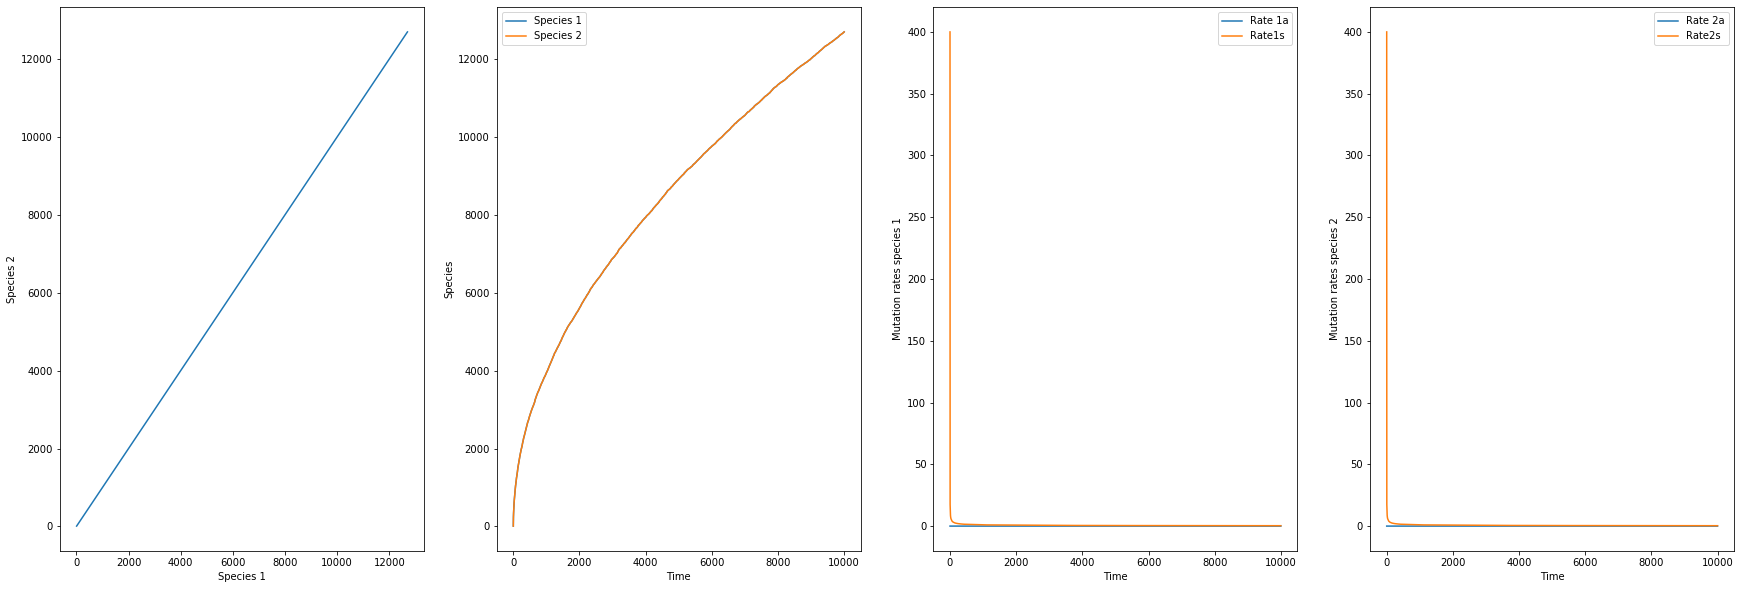

In [69]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 10000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0
_beta1 = 1
_alpha2 = 0
_beta2 = 1

num1=4000

num2=4000

coEvo(X,Y,"_alpha1","num2/(_beta1*X)","_alpha2","num2/(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

## I. All u are the same. 
### (1.) No a (antagonistic) mutations

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: Mean of empty slice


1006.4729227601305
997.9703773753059
[[ 10.989       10.989     ]
 [ 13.57351225  13.57351225]
 [ 15.57589803  15.57589803]
 [ 17.57588235  17.57588235]
 [ 19.59228972  19.59228972]
 [ 21.5034642   21.5034642 ]
 [ 23.59181287  23.59181287]
 [ 25.55011521  25.55011521]
 [ 27.52855478  27.52855478]
 [ 29.6277713   29.6277713 ]
 [ 31.64599775  31.64599775]
 [ 33.64929742  33.64929742]
 [ 35.62044653  35.62044653]
 [ 37.72488318  37.72488318]
 [ 39.59138533  39.59138533]
 [ 41.56720742  41.56720742]
 [ 43.65635939  43.65635939]
 [ 45.52848837  45.52848837]
 [ 47.60387324  47.60387324]
 [ 49.59101124  49.59101124]
 [ 51.72538553  51.72538553]
 [ 53.47737819  53.47737819]
 [ 55.58596491  55.58596491]
 [ 57.80818713  57.80818713]
 [ 59.71976744  59.71976744]
 [ 61.65102975  61.65102975]
 [ 63.52453271  63.52453271]
 [ 65.72795824  65.72795824]
 [ 67.72027972  67.72027972]
 [ 69.73878021  69.73878021]
 [ 71.76773455  71.76773455]
 [ 73.82942556  73.82942556]
 [ 75.67265353  75.67265353]
 [ 77.

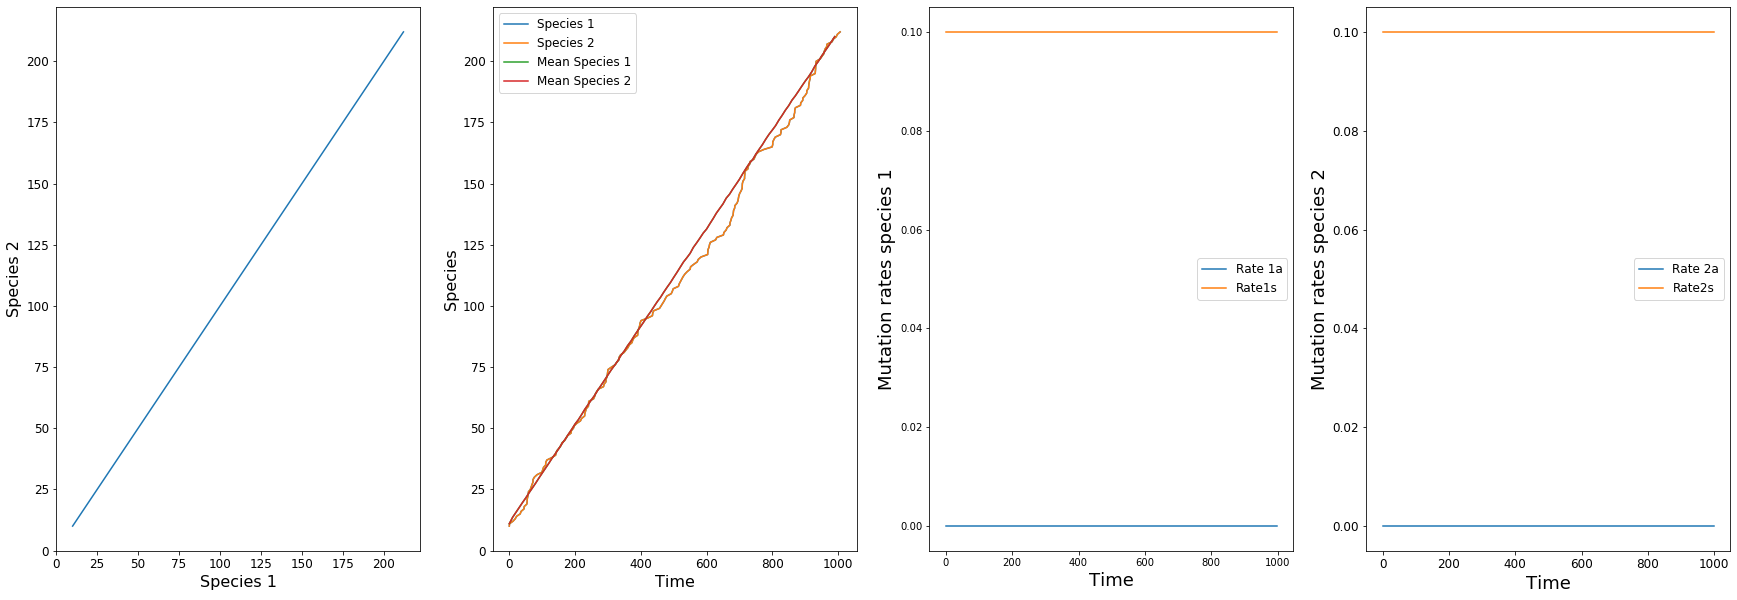

In [9]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0
u2s=0.1
num1=0  # not needed
num2=0
N=1000

eps=10

coEvo_N(eps,N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

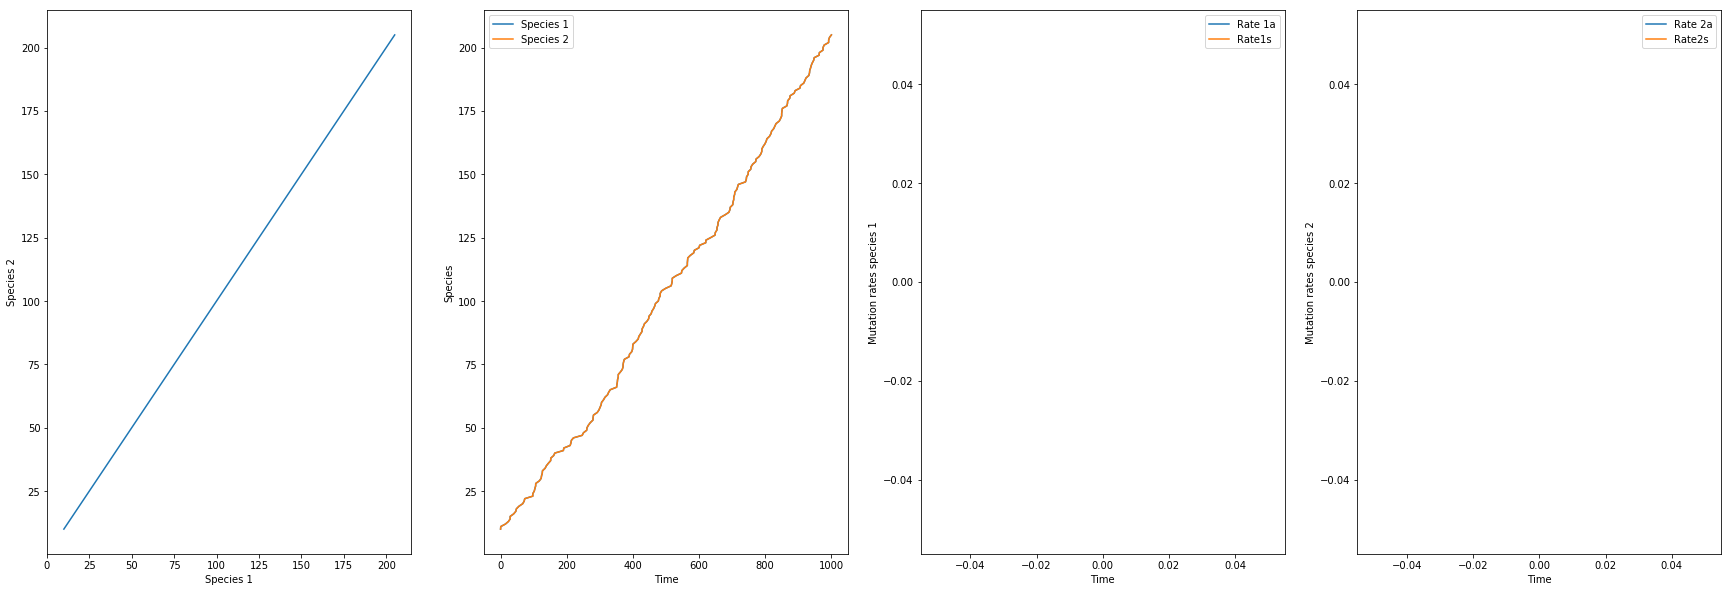

In [111]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (2.) No s(synergistic) mutations

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: Mean of empty slice


904.6047832639395
898.6178788176888
[[ 9.85916667 10.14083333]
 [ 9.83553114 10.16446886]
 [ 9.84542125 10.15457875]
 [10.09069767  9.90930233]
 [ 9.93920455 10.06079545]
 [ 9.90996169 10.09003831]
 [ 9.92743764 10.07256236]
 [ 9.74218074 10.25781926]
 [ 9.76626016 10.23373984]
 [ 9.58837209 10.41162791]
 [10.10711417  9.89288583]
 [10.31349206  9.68650794]
 [10.35492424  9.64507576]
 [ 9.98517179 10.01482821]
 [10.13378378  9.86621622]
 [10.33786008  9.66213992]
 [ 9.92488889 10.07511111]
 [ 9.88562963 10.11437037]
 [ 9.86140351 10.13859649]
 [ 9.74342105 10.25657895]
 [ 9.98333333 10.01666667]
 [ 9.71614583 10.28385417]
 [10.02995169  9.97004831]
 [ 9.76205128 10.23794872]
 [ 9.95111111 10.04888889]
 [ 9.46615385 10.53384615]
 [ 8.7202381  11.2797619 ]
 [ 9.16553672 10.83446328]
 [ 9.58209877 10.41790123]
 [ 9.57350649 10.42649351]
 [ 9.14712644 10.85287356]
 [ 9.65925926 10.34074074]
 [ 9.08592593 10.91407407]
 [ 9.5030303  10.4969697 ]
 [ 9.30680272 10.69319728]
 [ 8.89934641 11.10

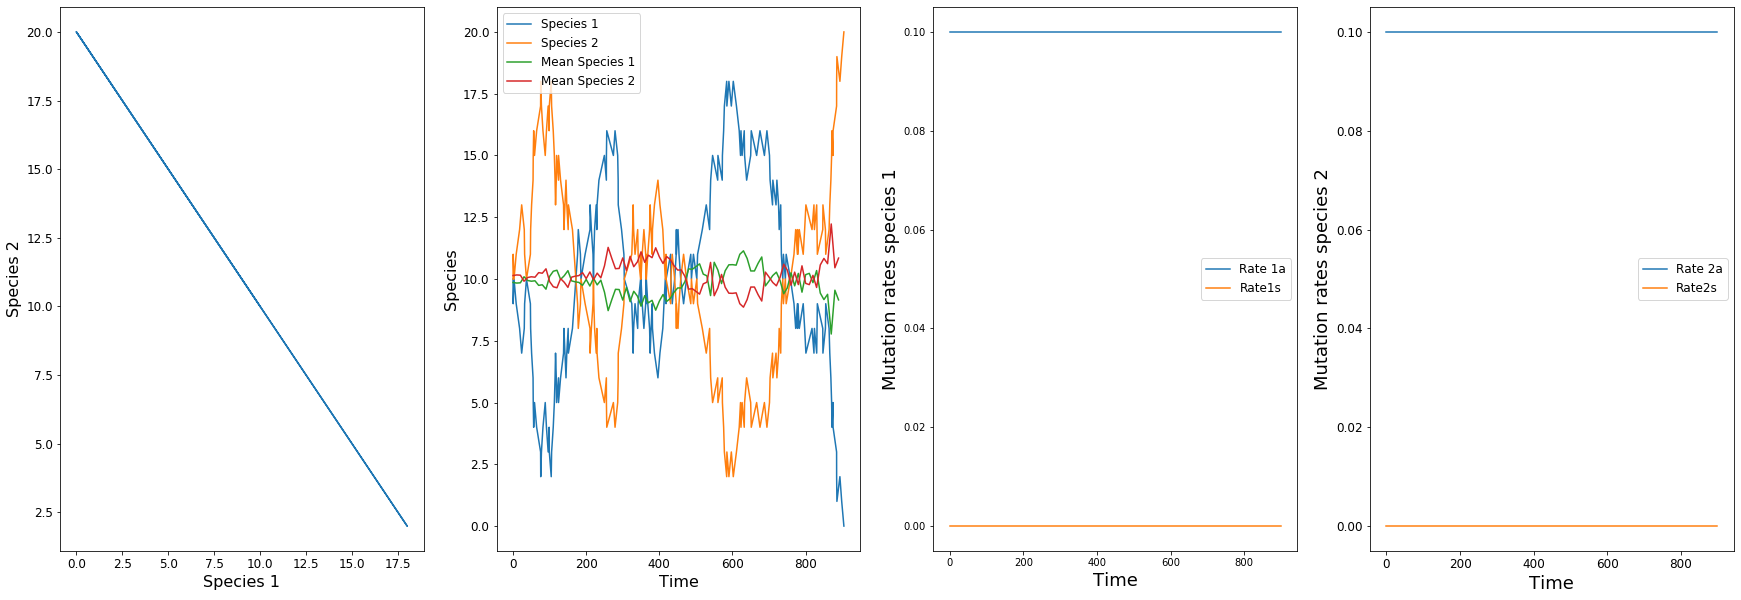

In [12]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0
u2a=0.1
u2s=0

N=100
eps=10

coEvo_N(eps,N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

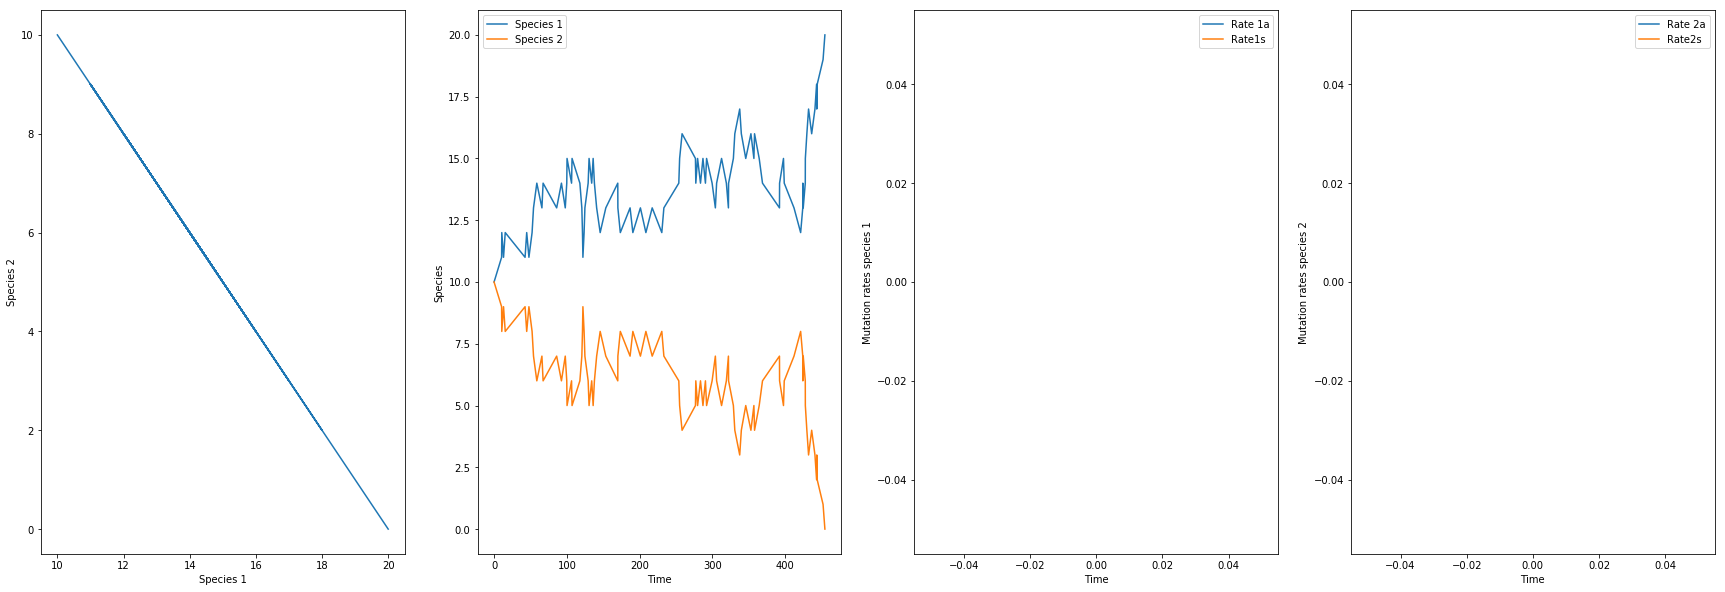

In [113]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## I. All u are the same. 
### (3.) 50% - 50% a and s.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: Mean of empty slice


1003.6701505397597
996.0426747374236
[[ 10.97495846  11.02307097]
 [ 13.16320376  13.28900173]
 [ 15.17406975  15.28371043]
 [ 17.23793814  17.31371021]
 [ 19.30248988  19.2416346 ]
 [ 21.40615157  21.27064888]
 [ 23.48929892  23.24743941]
 [ 25.4654869   25.1370954 ]
 [ 27.45221677  27.09287805]
 [ 29.43061872  29.17363879]
 [ 31.36584531  31.17457672]
 [ 33.34014784  33.2153288 ]
 [ 35.31204693  35.26469021]
 [ 37.38003032  37.34828259]
 [ 39.36539341  39.35726109]
 [ 41.49713743  41.36476138]
 [ 43.37858353  43.37570412]
 [ 45.47988769  45.24335054]
 [ 47.45261046  47.15075101]
 [ 49.44617546  49.16012069]
 [ 51.45918837  51.18297265]
 [ 53.44146533  53.14309551]
 [ 55.33304481  55.20699183]
 [ 57.25513033  57.080446  ]
 [ 59.13683691  59.0605359 ]
 [ 61.22922512  61.06212967]
 [ 63.12216835  63.18547248]
 [ 65.07185064  65.16581477]
 [ 67.07553179  67.25169479]
 [ 69.15240066  69.35328187]
 [ 71.19715667  71.25546918]
 [ 73.14603581  73.29995609]
 [ 75.1703842   75.39871243]
 [ 77.

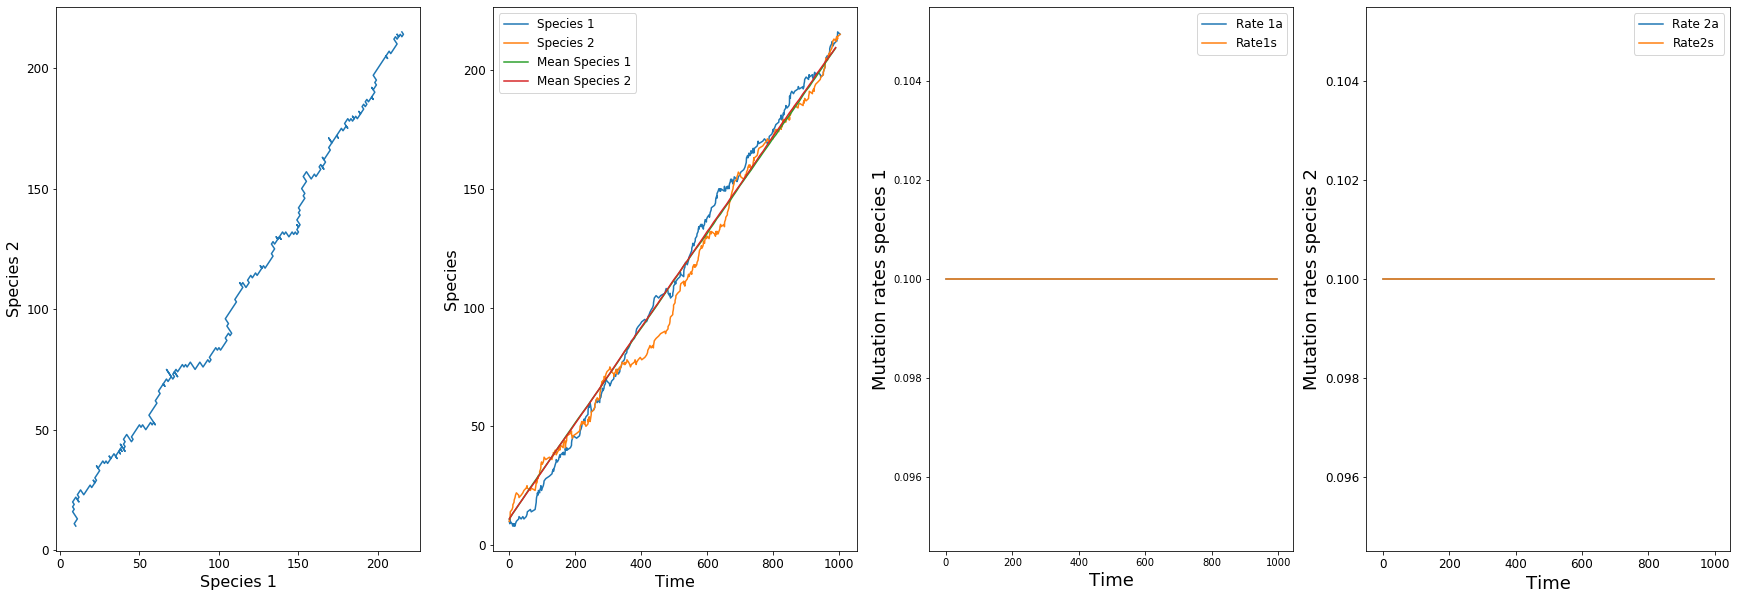

In [16]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0.1
u2a=0.1
u2s=0.1
N=1000

eps=10

coEvo_N(eps,N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

In [162]:
coEvoAvg_N(5,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

0.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
11.0
1

IndexError: index 1 is out of bounds for axis 0 with size 1

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: Mean of empty slice


31.333607165495653
31.27626337003401
[[10.44387845 10.96068926]
 [10.75132815 12.63873502]
 [10.9634757  13.21298478]
 [11.13862155 13.82599833]
 [11.42848609 14.27845195]
 [12.23776529 14.12877653]
 [12.88004363 14.1348691 ]
 [13.1411578  14.62464052]
 [13.31577623 15.03982772]
 [13.96387944 15.15222978]
 [14.4670151  15.50593302]
 [15.35659416 15.31671566]
 [15.70092425 15.6416315 ]
 [16.4031643  15.63394146]
 [16.4575873  16.37631746]]
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]


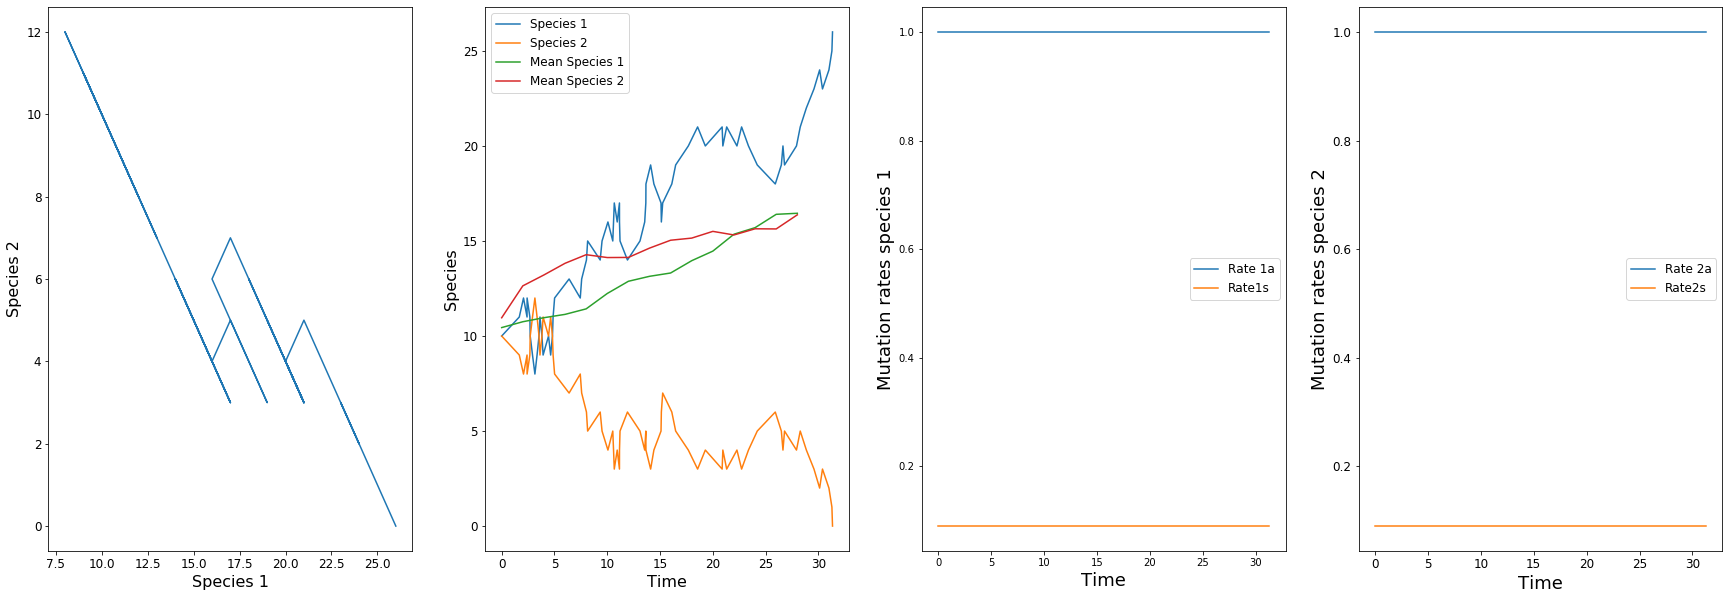

In [51]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=1
u1s=0.09

u2a=1
u2s=0.09
num1=0  # not needed
num2=0
N=100

eps=2

coEvo_N(eps,N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## II. Species are symmetric but vary rates of a and s mutations. (No dependence of fitness)
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

1001.5613333032155
998.9188687844892
[[  20.00472591   19.99183228]
 [  40.8525979    40.57819797]
 [  60.95016438   60.62431236]
 [  80.68417562   80.39610267]
 [ 100.26056687   99.97494087]
 [ 120.07487404  119.47532603]
 [ 139.97212128  139.09574133]
 [ 160.02003638  158.81080571]
 [ 180.0787883   178.97702559]
 [ 200.33615355  199.37346834]
 [ 221.07917392  219.7975045 ]
 [ 241.70448536  240.60286488]
 [ 262.14927499  261.30442031]
 [ 281.90519719  281.6874972 ]
 [ 301.61755942  302.05840755]
 [ 321.79974739  322.42564297]
 [ 342.19816403  342.60171162]
 [ 362.0532455   362.29230116]
 [ 381.87306662  382.14349558]
 [ 401.75879195  401.82597456]
 [ 421.61037812  421.60504815]
 [ 441.92206108  441.65695536]
 [ 461.6491655   461.35996506]
 [ 481.15273495  481.1340626 ]
 [ 500.98596828  500.93679893]
 [ 521.01710108  520.79945679]
 [ 540.83495717  540.72721938]
 [ 560.92902374  560.40764062]
 [ 580.84259586  580.20954788]
 [ 600.69000518  599.94789596]
 [ 620.66529346  620.03326481]
 [

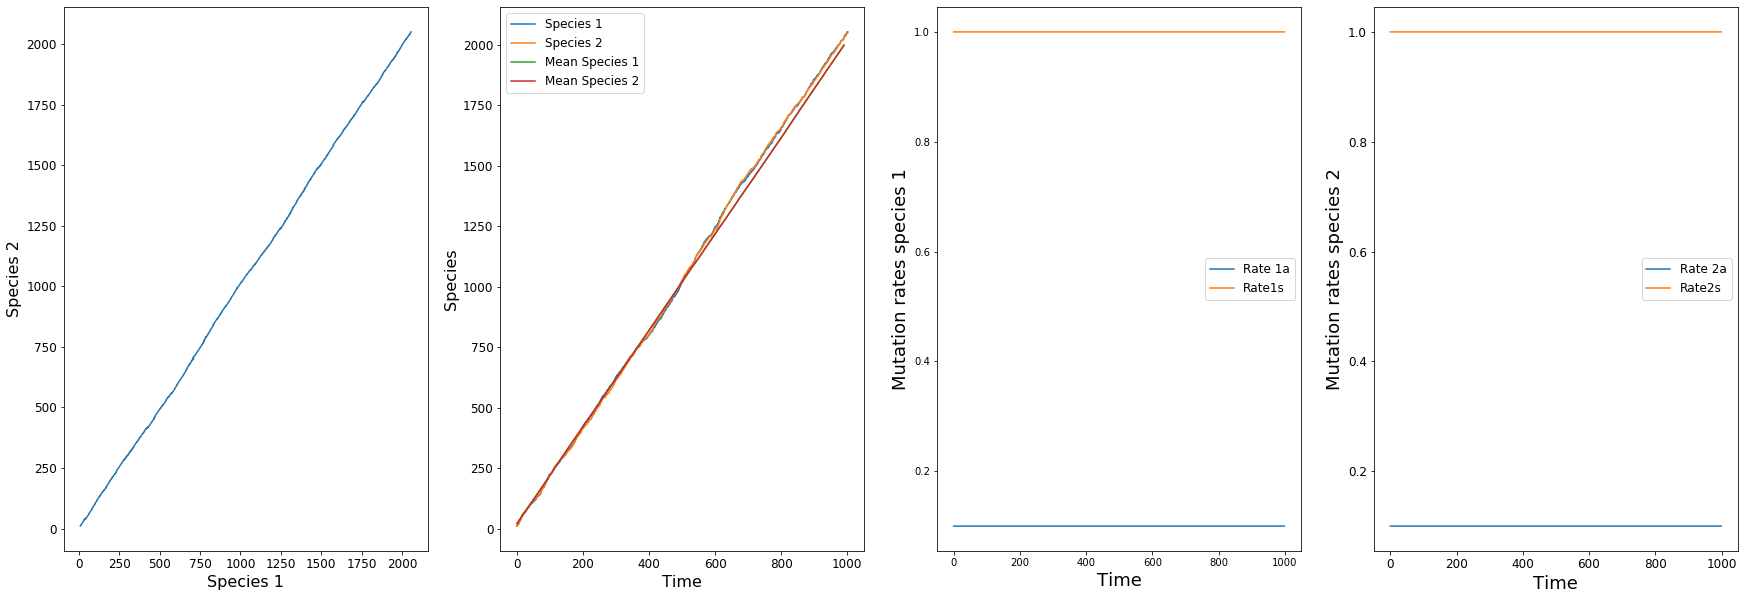

In [27]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=1
u2a=0.1
u2s=1


N=100
eps=10

coEvo_N(eps,N,X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

## III. Species are symmetric. And rates depend on fitness. Keep slopes the same

3.573515316554827
3.500767549945719
[]
[]


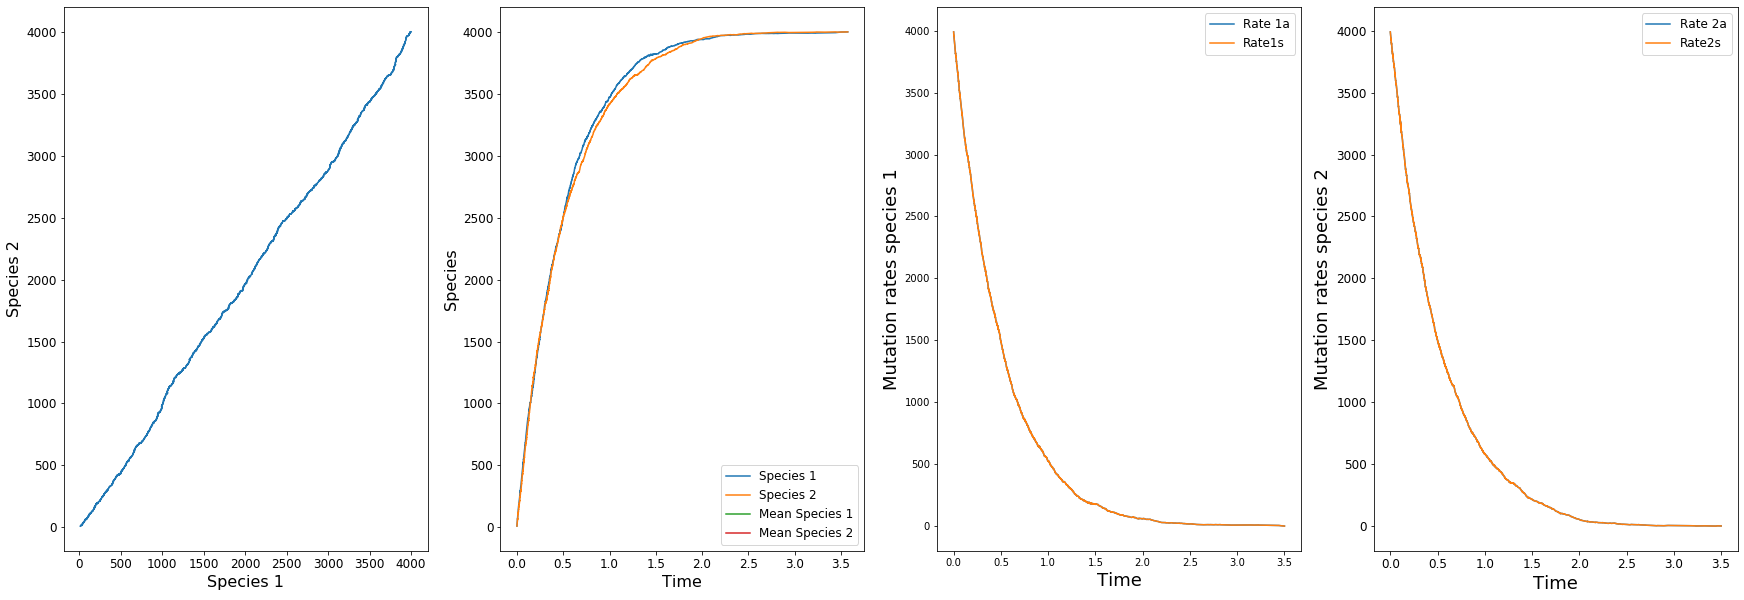

In [40]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 1
_beta1 = 1
_alpha2 = 1
_beta2 = 1

num1=4000
num2=4000
N=100


eps=

coEvo_N(eps,N,X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: Mean of empty slice


16.53917051338468
16.53417828791131
[[2.75142532 2.88205468]
 [2.76886652 2.83113348]
 [2.8386443  2.7613557 ]
 [2.76727001 2.83272999]
 [2.53674844 2.91779702]
 [2.5734291  2.88111636]
 [2.66214963 2.79239582]
 [2.509964   2.94458146]
 [2.60779221 2.84675325]
 [2.4041728  2.75046637]
 [2.39685435 2.75778483]
 [2.48397971 2.67065947]
 [2.21867168 2.62343358]
 [1.95325059 2.72760047]
 [2.08608333 2.4300457 ]
 [1.96745169 2.3803744 ]
 [2.10404506 2.41208397]
 [2.20621266 2.30991637]
 [2.37006315 2.14606588]
 [2.51694894 1.99918009]
 [2.49728261 1.85054348]
 [2.42853419 2.08759484]
 [2.33334187 2.18278717]
 [2.42549923 2.0906298 ]
 [2.48527673 2.0308523 ]
 [2.33686084 2.01096524]
 [2.31005912 2.20606992]
 [2.19762985 2.31849918]
 [2.13809524 2.37803379]
 [2.32814014 2.18798889]
 [2.35741594 2.15871309]
 [2.40314047 2.11298856]
 [2.31594982 2.20017921]
 [2.18626899 2.32986004]
 [2.06884281 2.44728623]
 [1.91915003 2.59697901]
 [1.86265807 2.65347096]
 [2.00160437 2.51452466]
 [2.03681516 2

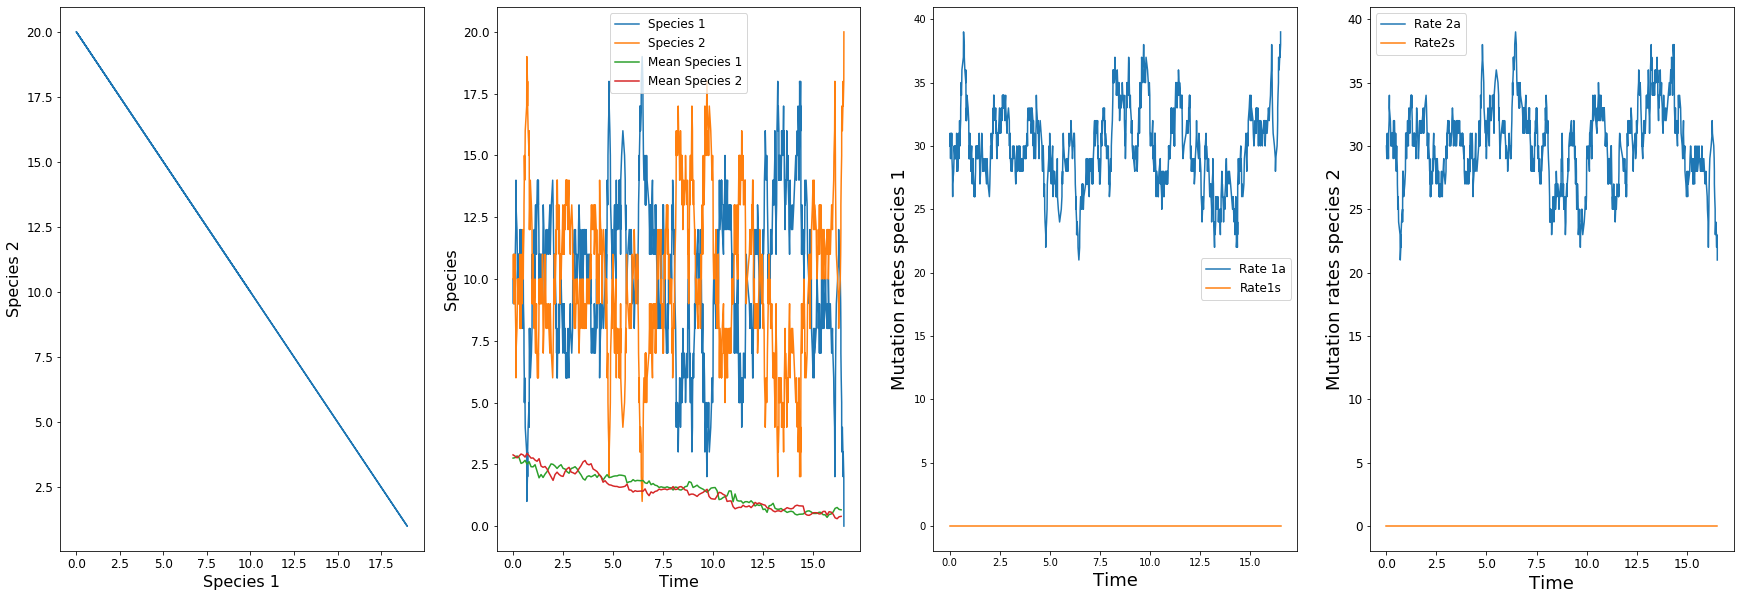

In [38]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 1
_beta1 = 0
_alpha2 = 1
_beta2 = 0

num1=40
num2=40
eps=0.1
N=100

coEvo_N(eps,N,X,Y,"num1-(_alpha1*X)","(_beta1)","num1-(_alpha2*Y)","_beta2",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

3.7461442468045334
3.1057303494886384
[[0.80155 0.80155]
 [0.      0.     ]
 [0.      0.     ]]
[0 1 2]


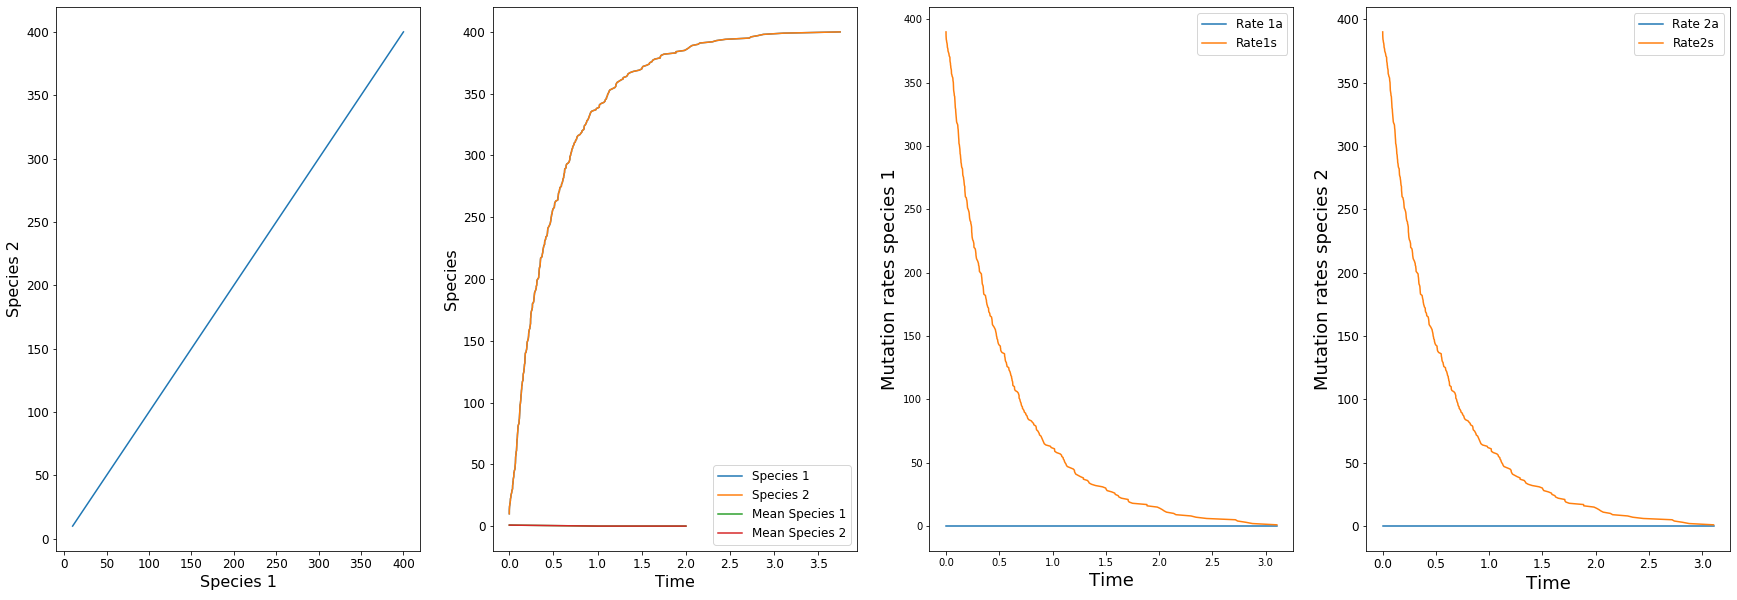

In [7]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0
_beta1 = 1
_alpha2 = 0
_beta2 = 1

num1=400
num2=400
N=100
eps=1

coEvo_N(eps,N,X,Y,"_alpha1","num1-(_beta1*X)","_alpha2","num1-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

## IV. Species are symmetric. Mutation rates are different between a and s.
### Case 1: High a (antagonistic) mutations , Low s (synergistic) mutations

81.13404979521678
81.13390791640846
[[120.32353593 120.44315062]
 [127.58822338 127.38409773]
 [128.51274869 129.17893469]
 [129.91555722 129.53488135]
 [130.52874508 130.63440581]
 [131.25855533 131.12939785]
 [131.54819527 132.24569148]
 [132.44397011 132.28566775]]
[ 0 10 20 30 40 50 60 70]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:161: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


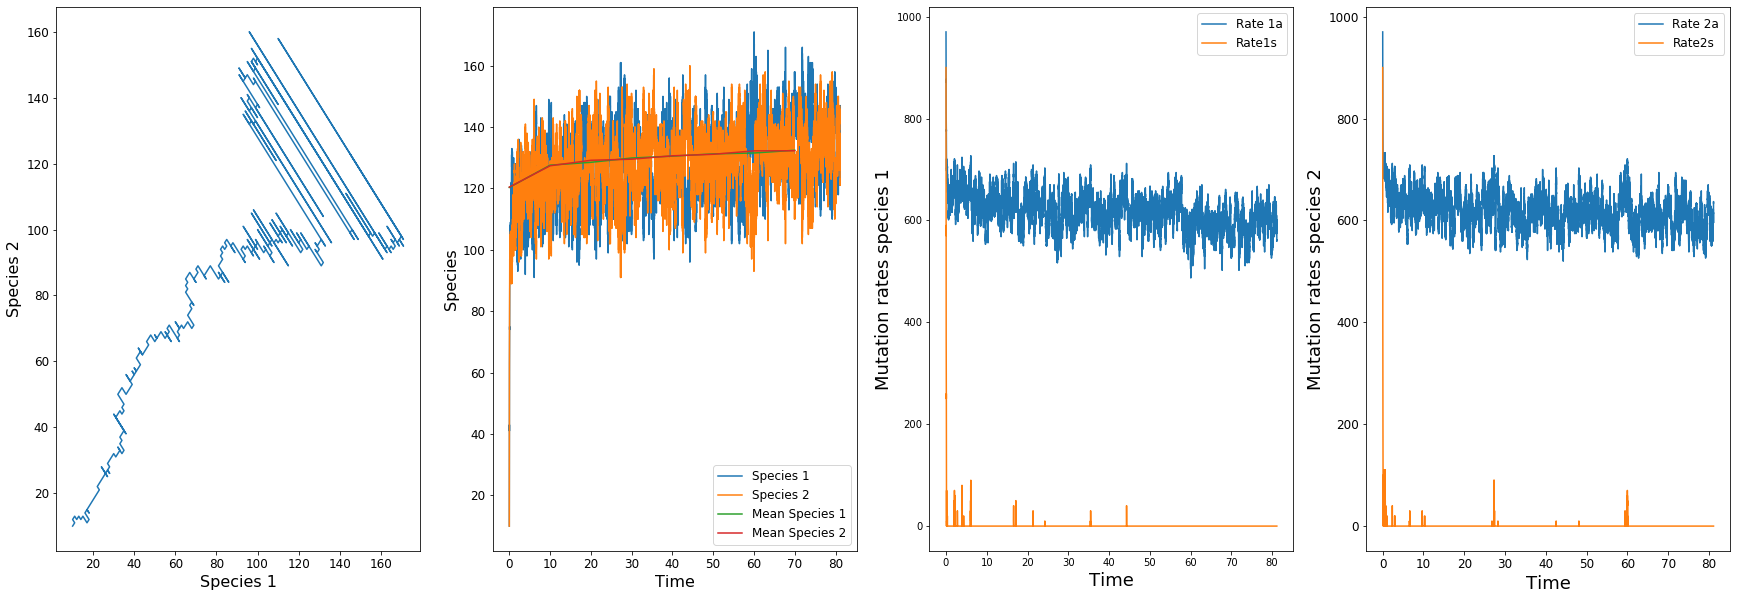

In [54]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 3#antagonistic 1 thereofore slow decrease with respect to X
_beta1 = 10 #synergistic
_alpha2 = 3
_beta2 = 10

num1=1000
num2=1000
N=100
eps=10

coEvo_N(eps,N,X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

266.6666666666667
242.42424242424244
222.2222222222222
205.12820512820514
206.34920634920633
191.45299145299145
178.57142857142856
167.32026143790853
157.40740740740742
148.60681114551082
150.0
141.9234360410831
134.6801346801347
128.14645308924483
122.22222222222221
116.82539682539684
111.8881118881119
107.35373054213633
103.17460317460316
99.3103448275862
98.90109890109889
95.35972754363559
92.06349206349205
88.98776418242491
86.11111111111111
83.41479309221245
83.33333333333334
83.41479309221245
83.33333333333334
80.8080808080808
78.43137254901961
76.19047619047619
74.07407407407408
72.07207207207207
72.12475633528265
72.28327228327228
70.37037037037038
68.55636123928807
66.83375104427736
65.19578612601869
63.63636363636364
62.14995483288166
62.04906204906205
60.63738156761413
59.28853754940711
57.99842395587076
58.080808080808076
56.840513983371125
56.763285024154584
55.579678679982635
54.44444444444444
54.51258517591434
54.44444444444444
53.3546752034147
53.333333333333336
52.2875

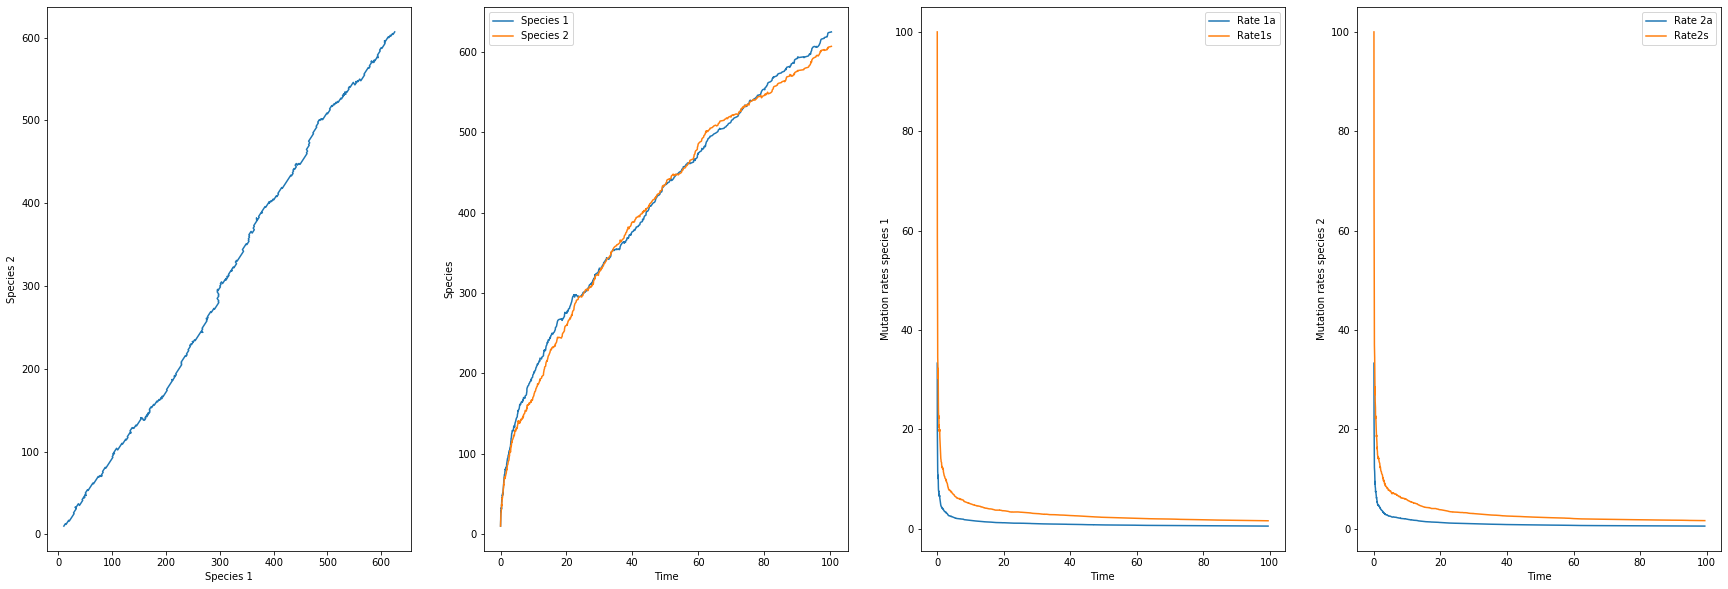

In [74]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 100.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0.3#antagonistic 1 thereofore slow decrease with respect to X
_beta1 = 0.1 #synergistic
_alpha2 = 0.3
_beta2 = 0.1

num1=100
num2=100

coEvo(X,Y,"num1/(_alpha1*X)","num2/(_beta1*X)","num1/(_alpha2*Y)","num2/(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num1-(X *_alpha1)
#         u1s =num1-(X *_beta1) 
#         u2a =num2-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

## IV. Species are symmetric. Slopes are different between a and s.
### Case 2: Low a (antagonistic) mutations , High s (synergistic) mutations

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: Mean of empty slice
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:120: RuntimeWarning: Mean of empty slice


301.63528546653447
275.6977381837976
[[ 6441.08909801  6444.87246925]
 [17404.25       17410.41      ]
 [21531.525      21537.685     ]
 [24588.18       24594.34      ]
 [26853.2        26859.36      ]
 [28530.455      28536.615     ]
 [29775.035      29781.195     ]
 [30696.82       30702.98      ]
 [31378.755      31384.915     ]
 [31883.24       31889.4       ]
 [32258.325      32264.485     ]
 [32537.995      32544.155     ]
 [32744.075      32750.235     ]
 [32894.825      32900.985     ]
 [33007.165      33013.325     ]
 [33091.445      33097.605     ]
 [33153.95       33160.11      ]
 [33200.27       33206.43      ]
 [33234.94       33241.1       ]
 [33260.37       33266.53      ]
 [33279.01       33285.17      ]
 [33293.295      33299.455     ]
 [33304.475      33310.635     ]
 [33313.115      33319.275     ]
 [33320.095      33326.255     ]
 [33326.28787879 33332.61111111]
 [33331.72959184 33337.75      ]
 [33335.39361702 33343.03191489]
 [33340.31182796 33346.87096774]
 [3334

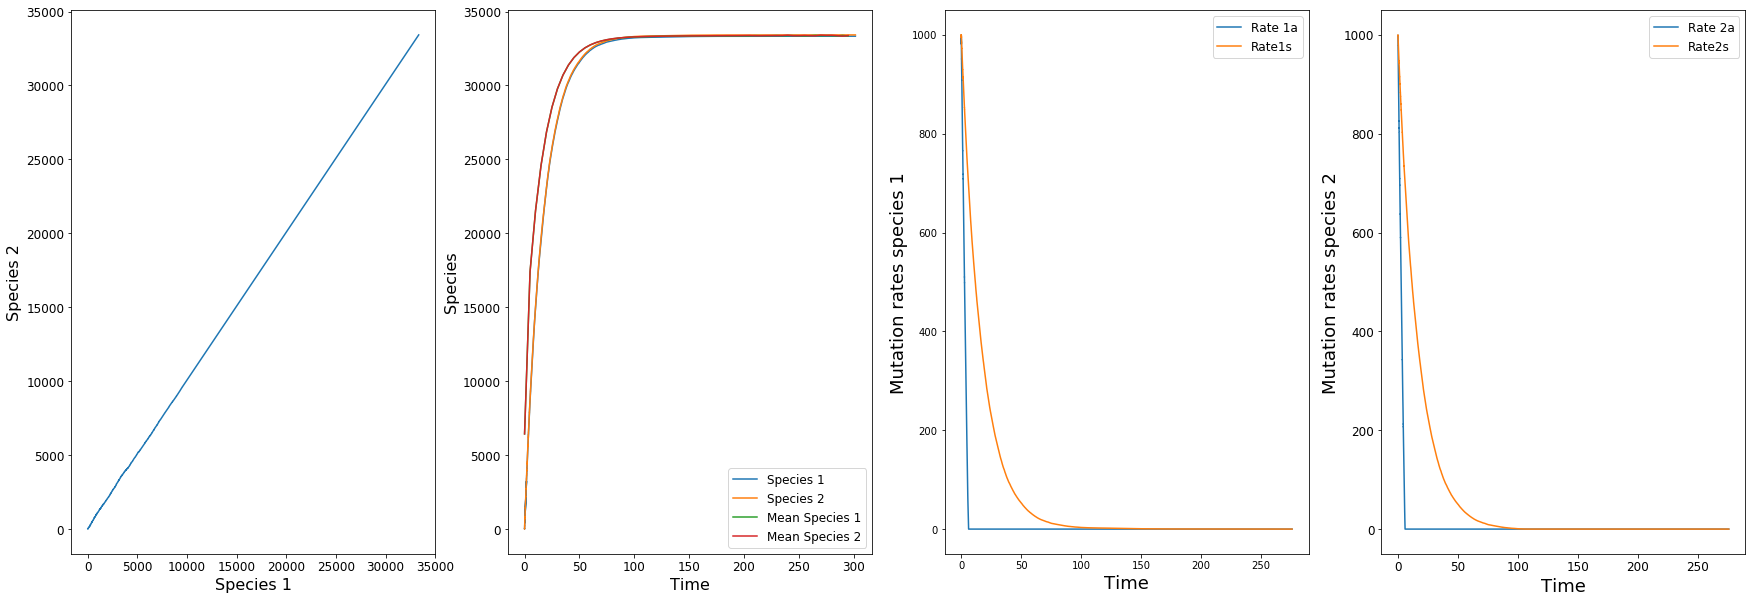

In [58]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

# CONSTANTS
_alpha1 = 0.1
_beta1 = 0.03
_alpha2 = 0.1
_beta2 = 0.03

num1=1000
num2=1000
N=100
eps=5


coEvo_N(eps,N,X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#         u1a =num-(X *_alpha1)
#         u1s =num-(X *_beta1) 
#         u2a =num-(Y *_alpha2) 
#         u2s =num-(Y *_beta2)

### Case 3: Slopes depend on fitness such that they are dependent on time such that there is an interesection between these 2

#### Synergistic more later on

200.562440442359
200.55612242117908
[[ 1951.76220606  1952.37285568]
 [ 5762.19965607  5761.01726059]
 [ 9368.69277078  9390.09362634]
 [12799.60169623 12840.5336124 ]
 [16065.71628124 16103.8780997 ]
 [19184.93237021 19219.13083437]
 [22155.14009078 22176.3796646 ]
 [24979.39916635 24994.31370306]
 [27667.46275244 27671.64527616]
 [30219.29042927 30221.14007266]
 [32643.64937162 32650.17967028]
 [34945.40776435 34953.95906671]
 [37135.68529095 37143.44362893]
 [39225.00059399 39229.03559077]
 [41241.87       41245.89001016]
 [43129.28       43133.3       ]
 [44927.425      44931.445     ]
 [46637.005      46641.025     ]
 [48260.655      48264.675     ]
 [49797.285      49801.305     ]]
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:161: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


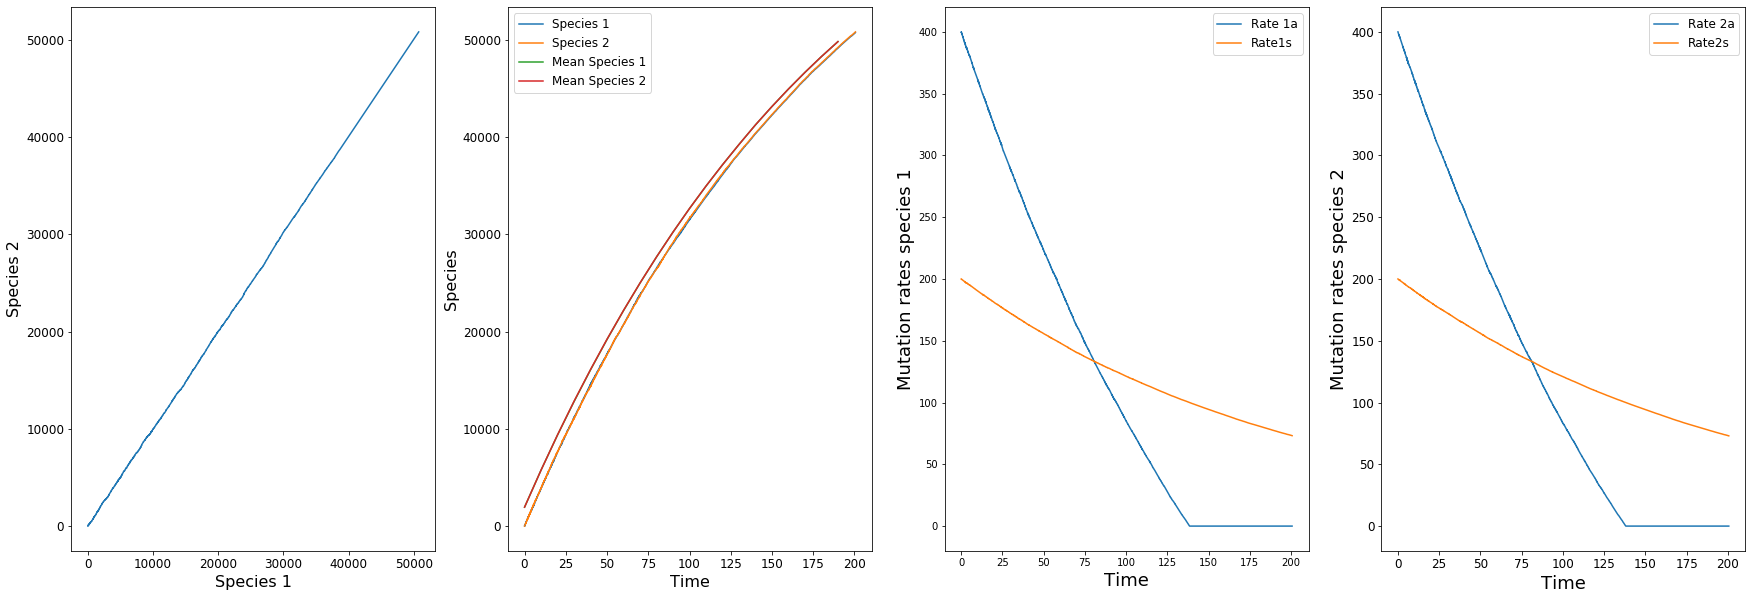

In [61]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.01
_beta1=0.0025
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200
N=100
eps=10
coEvo_N(eps,N,X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

#### Antagonist more


249.4779229367205
249.47354638846423
[[ 3657.08990049  3659.62262921]
 [10250.76481565 10248.65307305]
 [15646.72237861 15623.66348647]
 [20060.91758026 20037.10979556]
 [23678.82851559 23655.1554027 ]
 [26639.48776513 26616.55594483]
 [29060.86352925 29045.2361543 ]
 [31049.0377957  31018.86026939]
 [32672.65434889 32640.05584593]
 [33993.25691587 33968.89535421]
 [35090.42911093 35056.60934179]
 [35981.93613969 35951.81505144]
 [36707.79495687 36685.8989287 ]
 [37306.65931553 37287.7974923 ]
 [37794.89330089 37777.59341624]
 [38194.76478966 38180.39138402]
 [38524.37918623 38509.56900479]
 [38796.66233224 38779.70873306]
 [39017.69148229 38999.56291868]
 [39197.83004115 39181.18337363]
 [39345.03203726 39328.25134404]
 [39458.32112039 39455.31620339]
 [39557.59457966 39551.36914714]
 [39639.61288088 39629.46471523]]
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:150: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:161: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


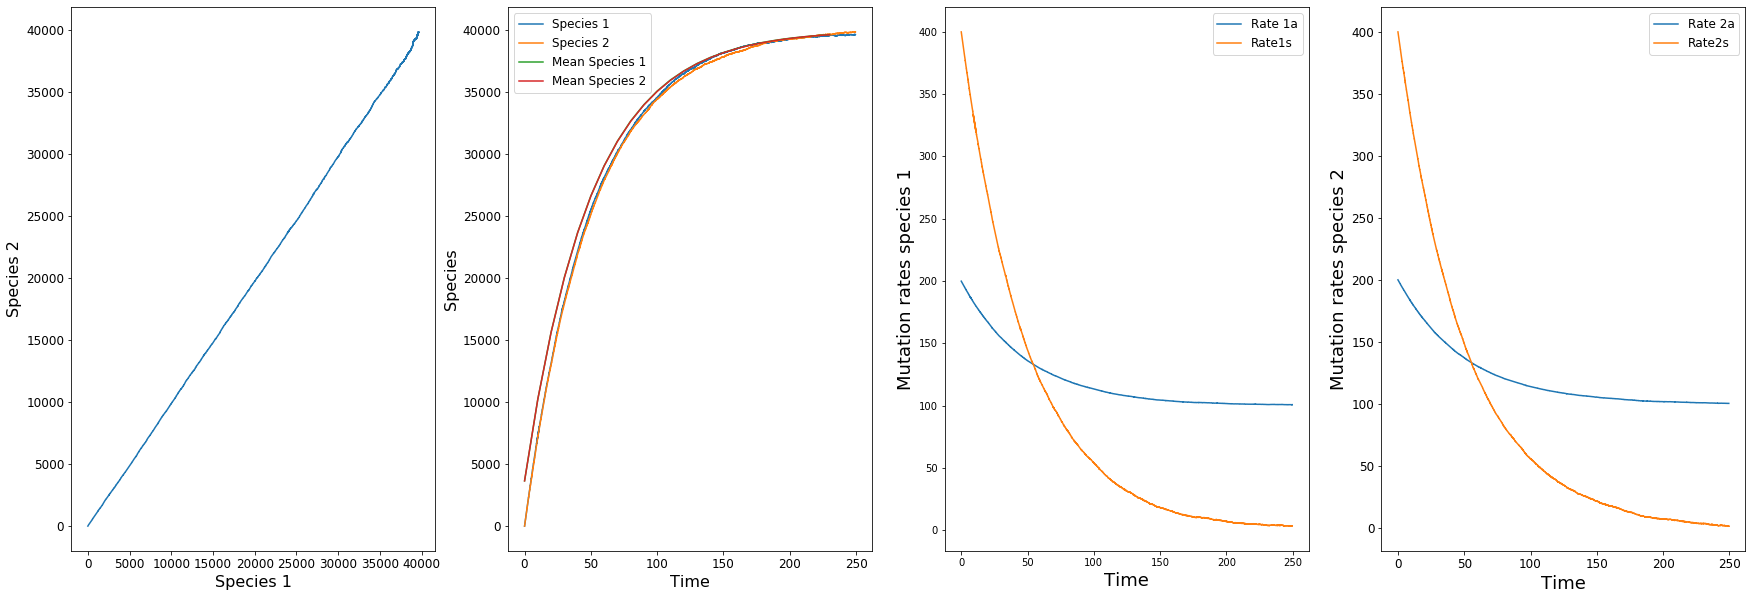

In [9]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0025
_beta1=0.01
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

eps=10
N=100

coEvo_N(eps,N,X,Y,"num1-(_alpha1*X)","num2-(_beta1*X)","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

## V. Species are different.
### Case 1.I: All u are the same. this does not exist


### Case 2.I: No a (antagonistic) mutations for one and no synergistic mutation for other

101


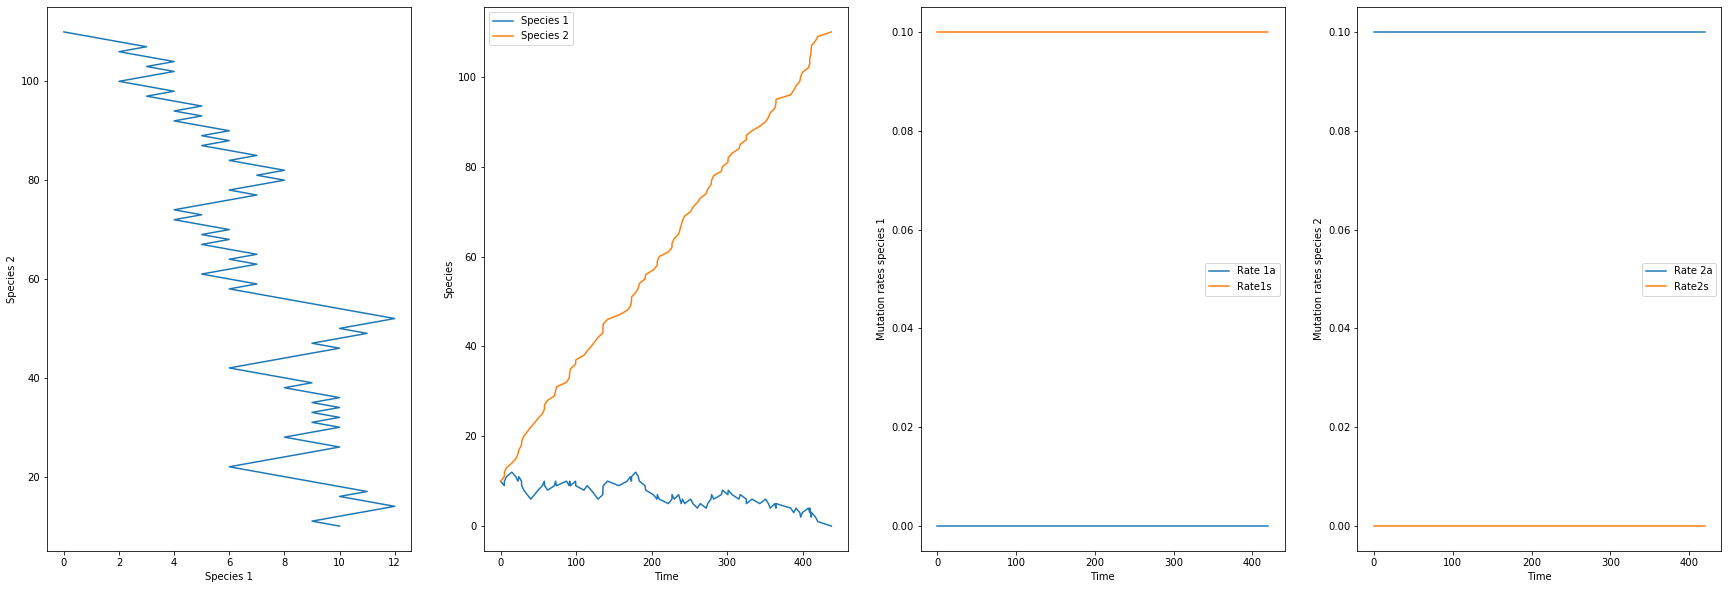

In [13]:
# Input parameters ####################
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.1
u2s=0
num1=0
num2=0


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 3.I: No a (antagonistic) mutations for one and 50 50 synergistic antagonist mutation for other

316


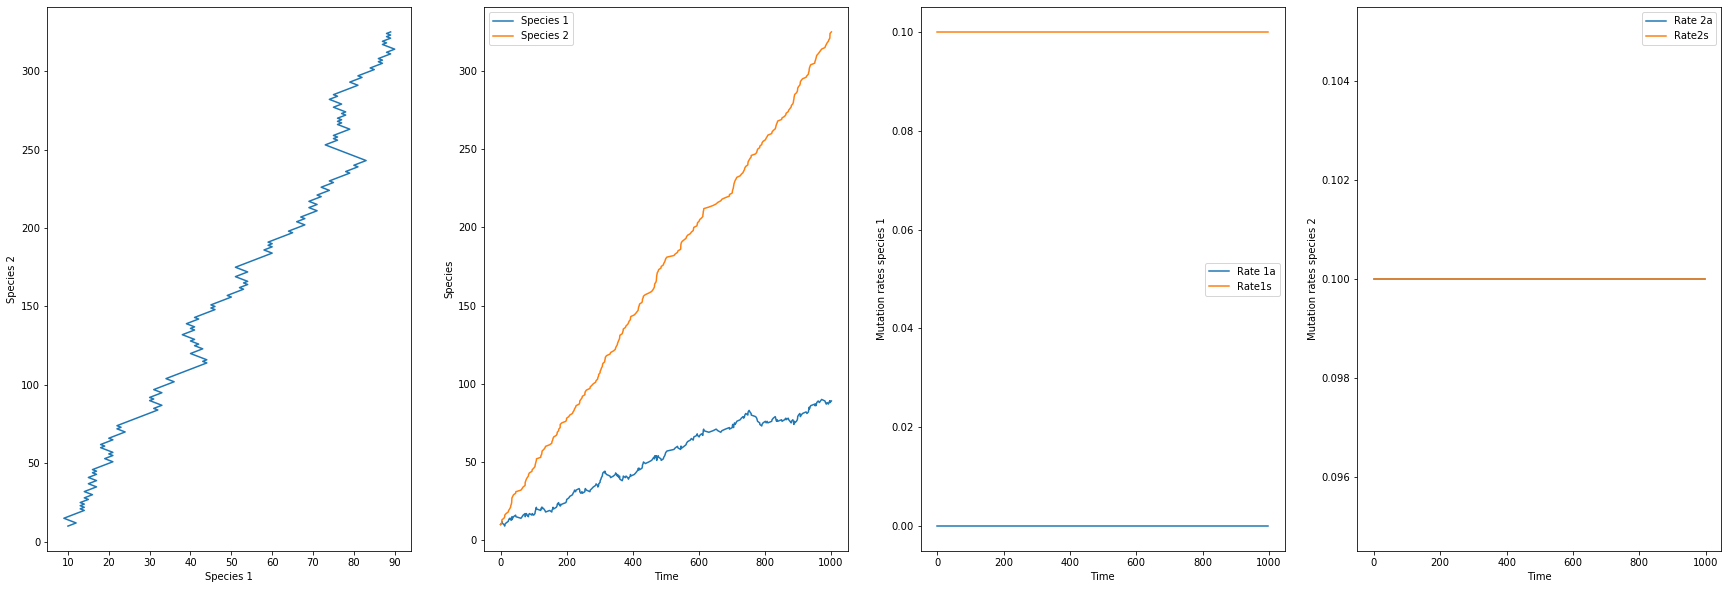

In [14]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.1
u2s=0.1
num1=0
num2=0


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

196


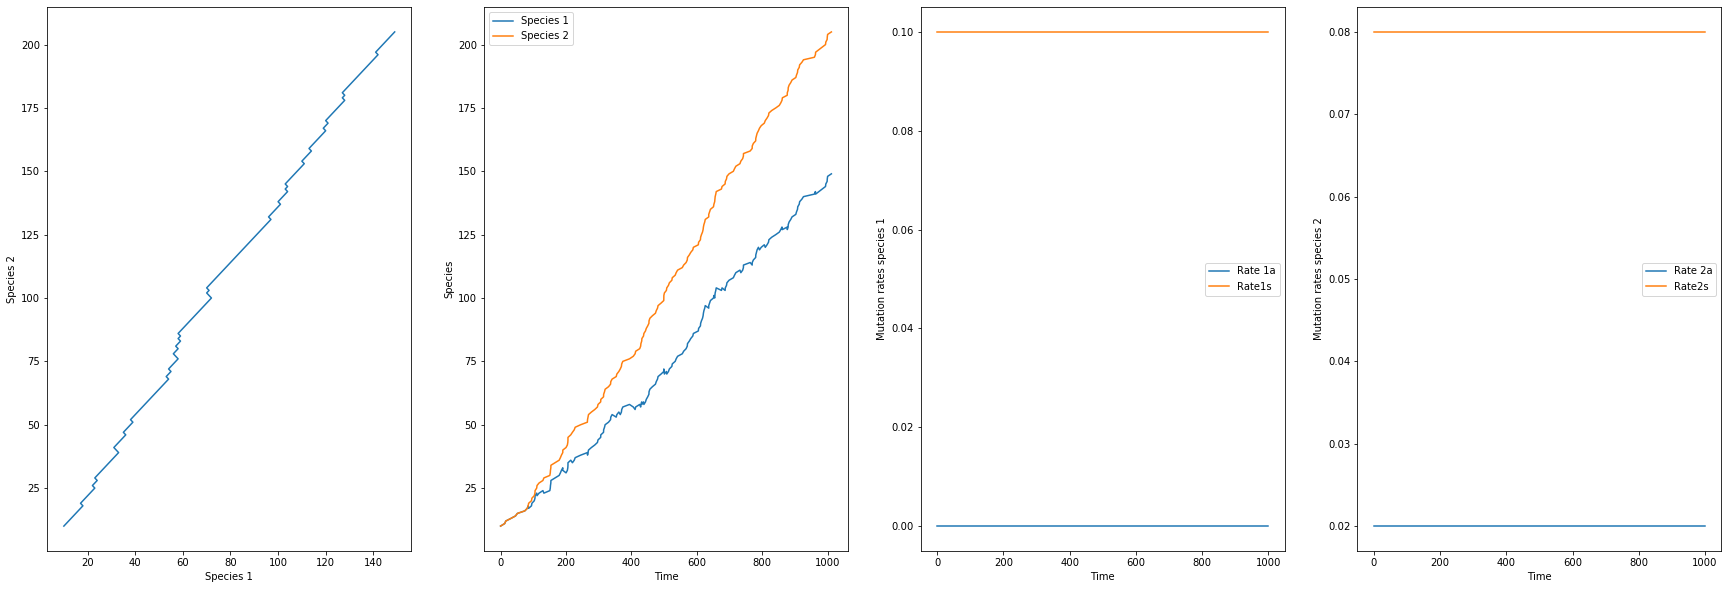

In [15]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.02
u2s=0.08


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 4.I: No a (antagonistic) mutations for one and synergistic more than antagonist mutation for other

226


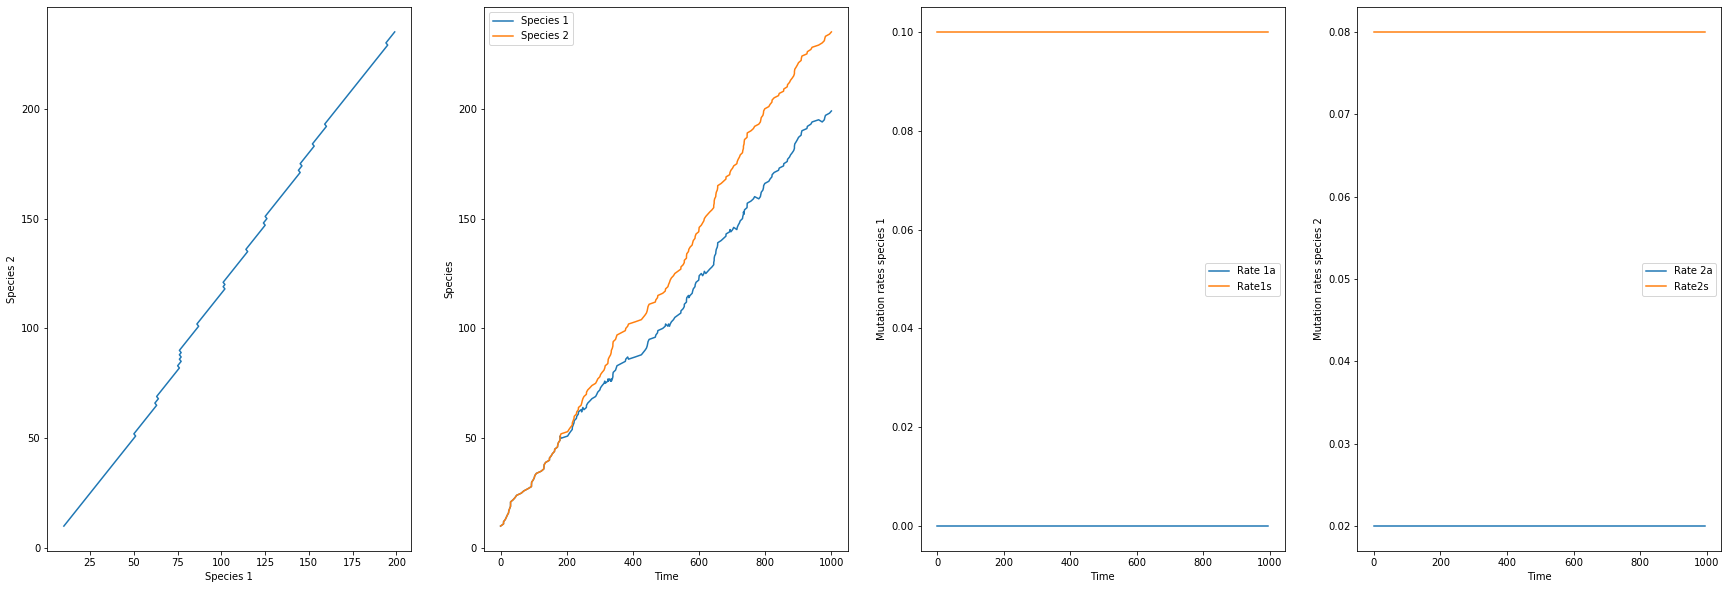

In [16]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0
u1s=0.1
u2a=0.02
u2s=0.08

coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,antagonist rate more later on

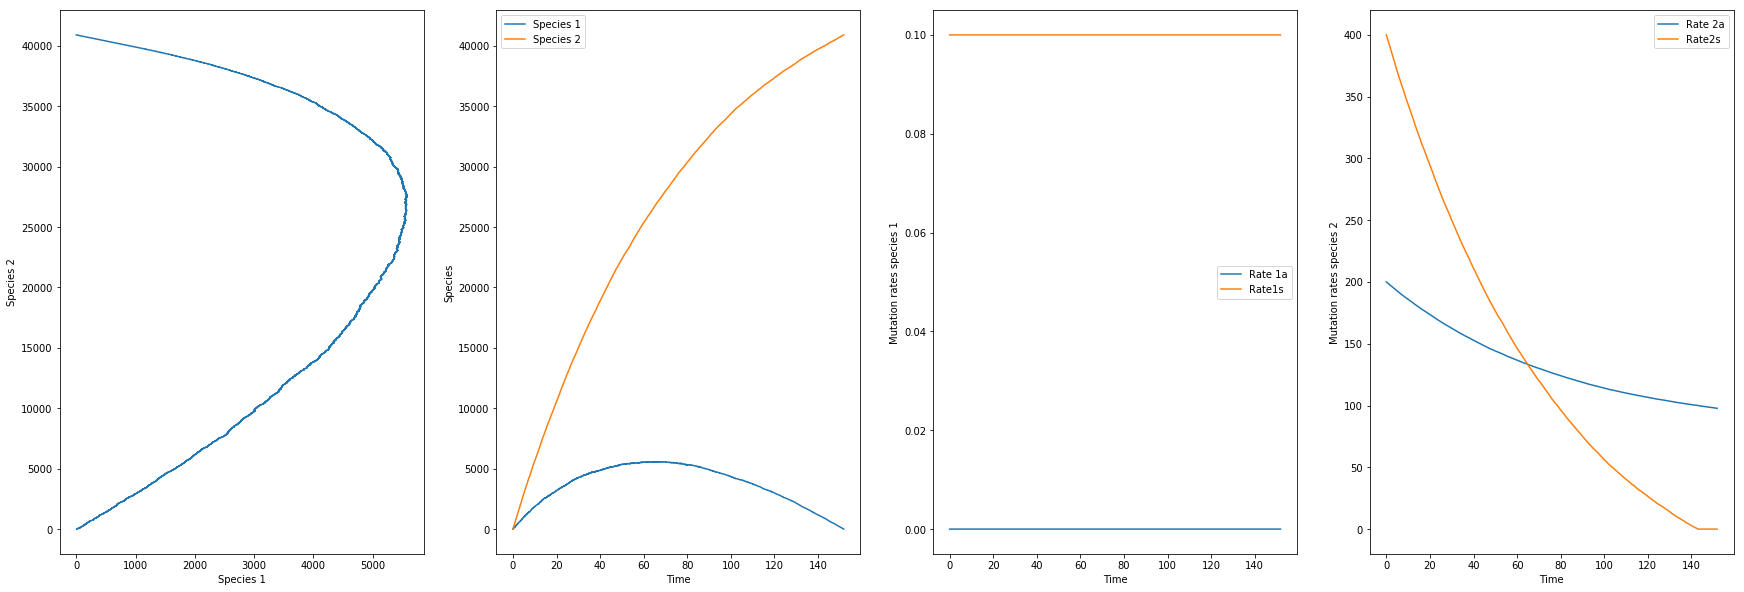

In [17]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.0025
_beta2=0.01
num2=400
num1=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 5.I: No a (antagonistic) mutations for one and dependent on fitness for other,synergistic more later on

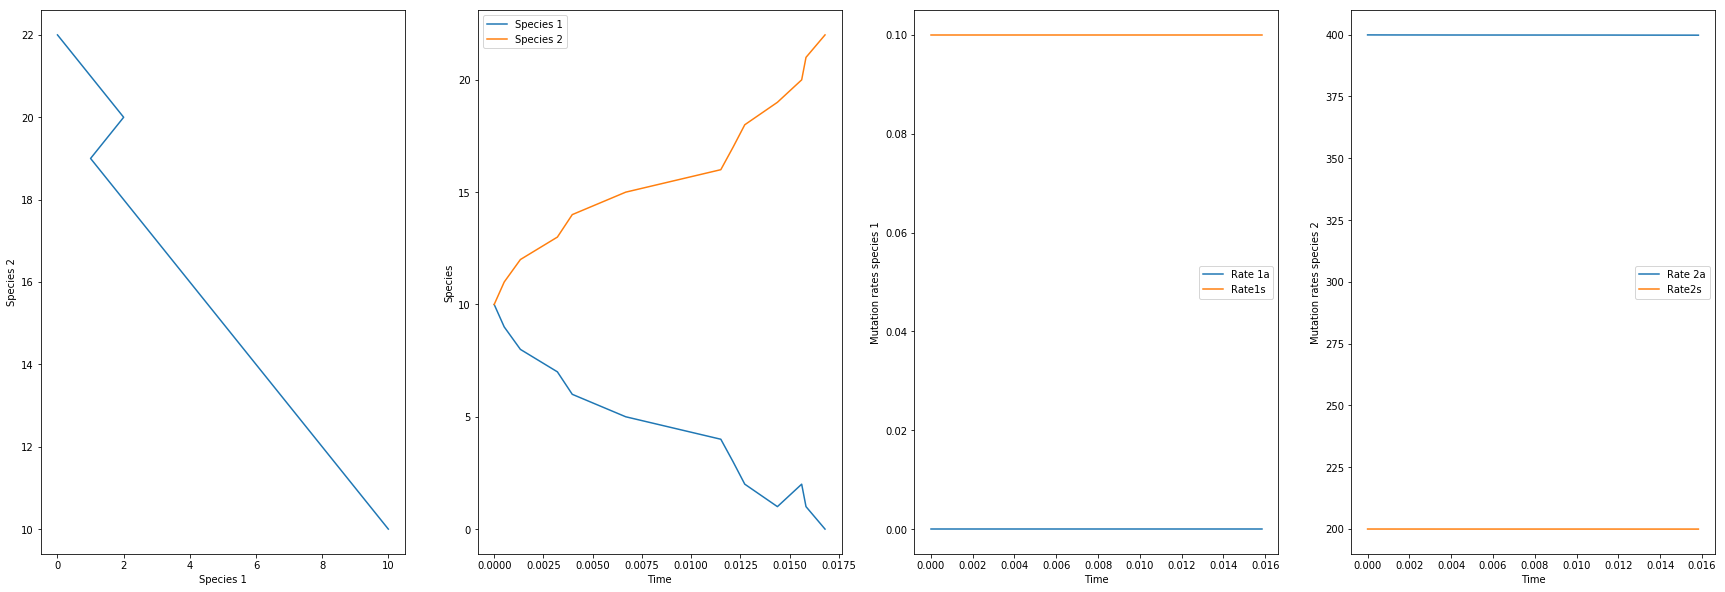

In [18]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.0
_beta1=0.1
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and 50 percent antagonist and synergistic for other 

305


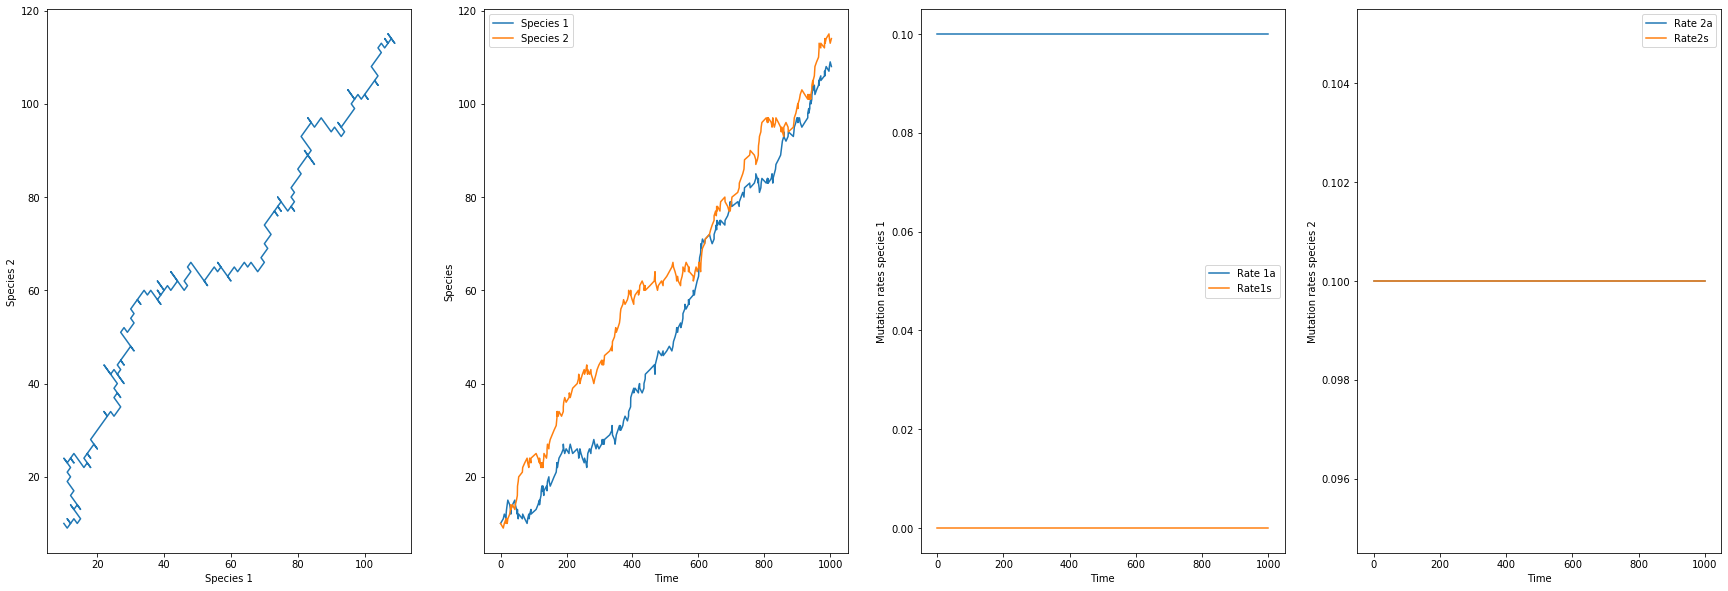

In [8]:
# Input parameters ####################
# int; total population
X = 10
Y = 10
# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

u1a=0.1
u1s=0
u2a=0.1
u2s=0.1
num1=0
num2=0


coEvo(X,Y,"u1a","u1s","u2a","u2s",u1a,u1s,u2a,u2s,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and antagonist more later on

27


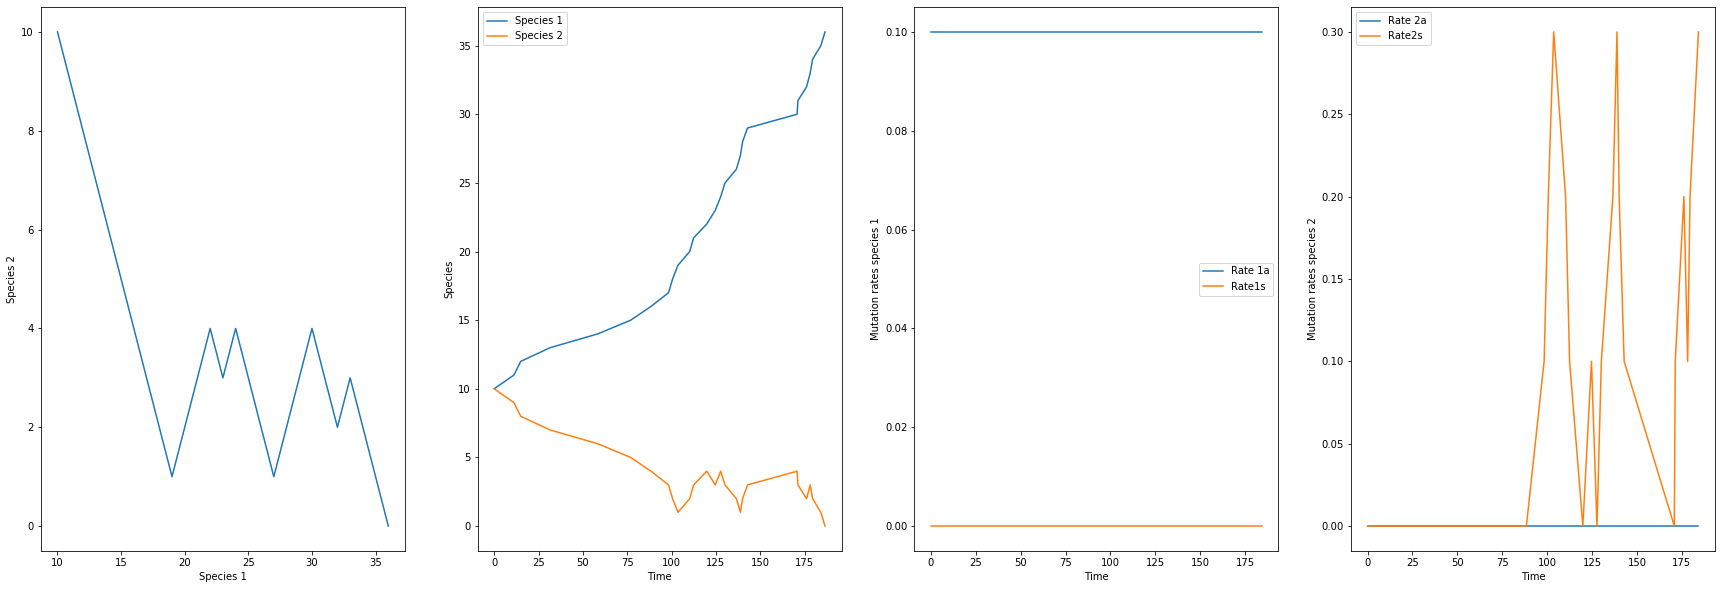

In [11]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.1
_beta1=0.0
_alpha2=0.25
_beta2=0.1
num2=0.4
num1=0.2

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

### Case 6.I: No s (synergistic) mutations for one and synergistic more later on for other

21


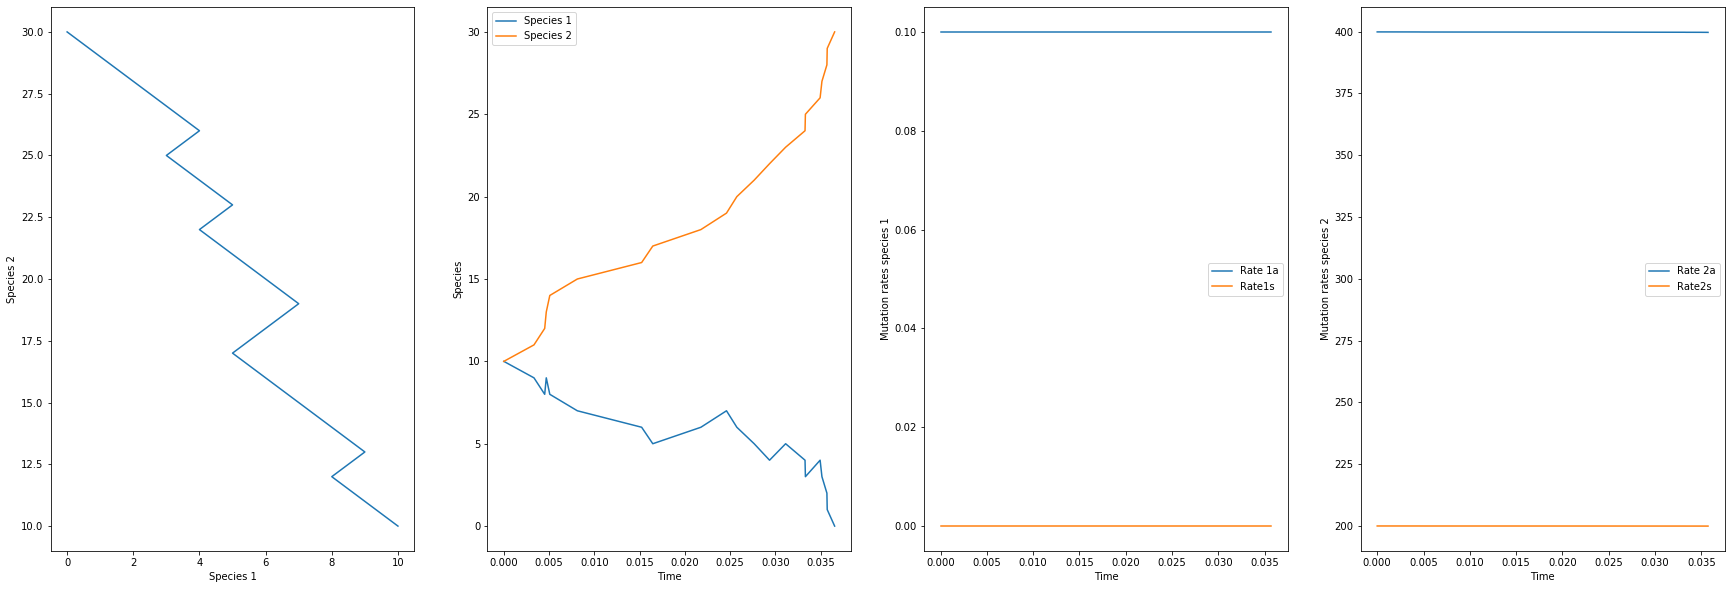

In [12]:
# Input parameters #################### Antagonist more
# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 
# float; start time
t = 0.0

_alpha1=0.1
_beta1=0.0
_alpha2=0.01
_beta2=0.0025
num1=400
num2=200

coEvo(X,Y,"_alpha1","_beta1","num1-(_alpha2*Y)","num2-(_beta2*Y)",_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t)

In [62]:
rate1=parser.expr('7/7.5').compile()
eval(rate1)


0.9333333333333333

In [3]:
def coEvo(X,Y,expr1,expr2,expr3,expr4,_alpha1,_beta1,_alpha2,_beta2,num1,num2,T,t):
    
    count1=1;
    # initialize Numpy array
    data = np.zeros((200000,3))
    mutrate1a = np.zeros((200000,1))
    mutrate1s = np.zeros((200000,1))
    mutrate2a= np.zeros((200000,1))
    mutrate2s= np.zeros((200000,1))
    
    #add first data
    data[0,:]=[t, X, Y]
    
    # Main loop
    while t < T and ((count1)<200000):
        if (X <= 0) | (Y<=0):
            break
            
        rate1 = parser.expr(expr1).compile()
        rate2= parser.expr(expr2).compile()
        rate3 = parser.expr(expr3).compile()
        rate4= parser.expr(expr4).compile()
              
        u1a =eval(rate1)
        u1s =eval(rate2)
        u2a =eval(rate3)
        u2s =eval(rate4)
        
        
#         u1a =num1-(X*_alpha1)
#         u1s =num2-(X *_beta1) 
#         u2a =num1-(Y *_alpha2) 
#         u2s =num2-(Y *_beta2)

        if u1a <0:
            u1a=0
        if u1s<0:
            u1s=0
        if u2a <0:
            u2a=0
        if u2s<0:
            u2s=0   
        
        mutrate1a[count1-1]=u1a
        mutrate1s[count1-1]=u1s
        mutrate2a[count1-1]=u2a
        mutrate2s[count1-1]=u2s

        W = u1a + u1s+ u2a+ u2s
#         print(W)
        if W == 0: 
            break
            
        # time point at which evolution happens
        dt = -math.log(random.uniform(0.0, 1.0))/W
        t = t + dt

        # make adjustment of comapring which is small and use in place of u1s
        rand=random.uniform(0.0, 1.0)
        if rand < u1a / W:
            #A1 deleterious mutation in Y
            X = X + 1
            Y = Y - 1
        elif rand < (u1a+u1s) / W:
            #S1 beneficial mutation in Y
            X = X + 1
            Y = Y + 1
        elif rand<(u1a+u1s+u2a)/W:
            #A2 
            X = X - 1
            Y = Y + 1
        else:
            #S2
            X = X + 1
            Y = Y + 1     

        data[count1,:]=[t, X, Y]
        count1+=1
             
    # cutting unused 0s    
    
#     print(mutrate1a[count1-1])
    data=data[0:count1,:]
    mutrate2a=mutrate2a[0:count1-1]
    mutrate2s=mutrate2s[0:count1-1]
    mutrate1a=mutrate1a[0:count1-1]
    mutrate1s=mutrate1s[0:count1-1]
    
    # Ploting
#     print(count1)
    fig,ax=plt.subplots(1,4, figsize = (30, 10))
    ax[0].plot(data[:,1],data[:,2])
    ax[0].set_xlabel('Species 1')
    ax[0].set_ylabel('Species 2')


    figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
    ax[1].legend(figure1, ('Species 1','Species 2'))
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Species')

    figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
    ax[2].set_xlabel('Time')
    ax[2].set_ylabel('Mutation rates species 1')
    ax[2].legend(figure2, ('Rate 1a','Rate1s'))

    figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
    ax[3].set_xlabel('Time')
    ax[3].set_ylabel('Mutation rates species 2')
    ax[3].legend(figure3,('Rate 2a','Rate2s'))
    return;